In [194]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

import numpy as np
import scipy as sp

from scipy.spatial import distance
from math import sin, cos, sqrt, atan2, radians
import time

from shapely.geometry import shape, Point
import shapely.wkt

import random

# Importing Data

In [195]:
permits = pd.read_csv('data/final_permits.csv')

# Pairplot
It would be great to make one, but there are too many features

# DBSCAN
Building different versions of DBSCAN with different feature sets.

## First Feature Set

In [196]:
permits.columns

Index(['bin_no', 'house_no', 'street_name', 'job_no', 'zip_code',
       'job_start_date', 'latitude', 'longitude', 'total_complaints',
       'closest_subway',
       ...
       'bct2020_5027702', 'bct2020_5027704', 'bct2020_5027900',
       'bct2020_5029102', 'bct2020_5029104', 'bct2020_5029105',
       'bct2020_5030302', 'bct2020_5031901', 'bct2020_5031902',
       'bct2020_5032300'],
      dtype='object', length=1451)

In [197]:
permits.shape

(7177, 1451)

In [198]:
col_list = permits.columns.to_list()

In [199]:
col_list

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'latitude',
 'longitude',
 'total_complaints',
 'closest_subway',
 'closest_subway_line',
 'subway_count_tenth_mi',
 'subway_count_half_mi',
 'subway_count_one_mi',
 'subway_count_two_five_mi',
 'hist_dist_name',
 'closest_park',
 'name_closest_park',
 'park_count_tenth_mi',
 'park_count_half_mi',
 'park_count_one_mi',
 'park_count_two_five_mi',
 'pop_20',
 'hhpop_20p',
 'gq_20p',
 'instgq_20p',
 'avhhsz_20',
 'popu18_20p',
 'hsp_20p',
 'wnh_20p',
 'bnh_20p',
 'anh_20p',
 'onh_20p',
 'nh2pl_20p',
 'hunits_20',
 'ochu_20p',
 'vachu_20p',
 'borough_BROOKLYN',
 'borough_MANHATTAN',
 'borough_QUEENS',
 'borough_STATEN ISLAND',
 'owners_business_type_CORPORATION',
 'owners_business_type_HPD',
 'owners_business_type_INDIVIDUAL',
 'owners_business_type_NYC AGENCY',
 'owners_business_type_NYCHA/HHC',
 'owners_business_type_OTHER',
 "owners_business_type_OTHER GOV'T AGENCY",
 'owners_business_type_PARTNERSHIP',


In [200]:
to_drop1 = ['bin_no', 'house_no', 'street_name', 'job_no', 'zip_code', 'job_start_date','hist_dist_name','name_closest_park', 'closest_subway_line']

In [201]:
to_drop1

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line']

In [202]:
permits.shape

(7177, 1451)

In [203]:
perms_use1 = permits.drop(columns = to_drop1)

In [204]:
perms_use1.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1,bct2020_1001200,bct2020_1001402,bct2020_1001501,bct2020_1001502,bct2020_1001600,bct2020_1001800,bct2020_1002100,bct2020_1002201,bct2020_1002202,bct2020_1002601,bct2020_1002602,bct2020_1002800,bct2020_1003001,bct2020_1003002,bct2020_1003300,bct2020_1003400,bct2020_1003601,bct2020_1003602,bct2020_1003700,bct2020_1003800,bct2020_1003900,bct2020_1004100,bct2020_1004200,bct2020_1004300,bct2020_1004500,bct2020_1004700,bct2020_1005400,bct2020_1005502,bct2020_1005800,bct2020_1006400,bct2020_1006800,bct2020_1006900,bct2020_1007002,bct2020_1007100,bct2020_1007300,bct2020_1007400,bct2020_1007500,bct2020_1007800,bct2020_1008100,bct2020_1008700,bct2020_1008800,bct2020_1008900,bct2020_1009100,bct2020_1009500,bct2020_1009700,bct2020_1009800,bct2020_1009901,bct2020_1009902,bct2020_1009903,bct2020_1010000,bct2020_1011100,bct2020_1011201,bct2020_1011500,bct2020_1012101,bct2020_1012700,bct2020_1012901,bct2020_1012902,bct2020_1013201,bct2020_1013300,bct2020_1013501,bct2020_1013502,bct2020_1013602,bct2020_1013800,bct2020_1013900,bct2020_1014000,bct2020_1014200,bct2020_1014402,bct2020_1014500,bct2020_1014601,bct2020_1014801,bct2020_1014802,bct2020_1014900,bct2020_1015001,bct2020_1015002,bct2020_1015102,bct2020_1015200,bct2020_1015402,bct2020_1015501,bct2020_1015601,bct2020_1015900,bct2020_1016200,bct2020_1016400,bct2020_1016600,bct2020_1016700,bct2020_1016900,bct2020_1017000,bct2020_1017200,bct2020_1017401,bct2020_1017402,bct2020_1017500,bct2020_1017800,bct2020_1017900,bct2020_1018000,bct2020_1018100,bct2020_1018200,bct2020_1018300,bct2020_1018600,bct2020_1018700,bct2020_1018800,bct2020_1018900,bct2020_1019000,bct2020_1019100,bct2020_1019200,bct2020_1019300,bct2020_1019400,bct2020_1019600,bct2020_1019702,bct2020_1019800,bct2020_1020000,bct2020_1020102,bct2020_1020500,bct2020_1020600,bct2020_1020701,bct2020_1020800,bct2020_1020901,bct2020_1021100,bct2020_1021303,bct2020_1021500,bct2020_1021800,bct2020_1021900,bct2020_1022102,bct2020_1022200,bct2020_1022400,bct2020_1022600,bct2020_1022700,bct2020_1022800,bct2020_1023000,bct2020_1023100,bct2020_1023200,bct2020_1023300,bct2020_1023400,bct2020_1023501,bct2020_1023502,bct2020_1023600,bct2020_1023700,bct2020_1023804,bct2020_1024200,bct2020_1024301,bct2020_1024500,bct2020_1025100,bct2020_1025700,bct2020_1025900,bct2020_1026900,bct2020_1027300,bct2020_1027900,bct2020_1028300,bct2020_1028700,bct2020_1029100,bct2020_1029500,bct2020_2000200,bct2020_2000400,bct2020_2001600,bct2020_2001901,bct2020_2001902,bct2020_2002001,bct2020_2002002,bct2020_2002500,bct2020_2002701,bct2020_2002800,bct2020_2003100,bct2020_2003300,bct2020_2003500,bct2020_2003800,bct2020_2004100,bct2020_2004300,bct2020_2004400,bct2020_2005002,bct2020_2005100,bct2020_2005902,bct2020_2006301,bct2020_2006400,bct2020_2006500,bct2020_2006700,bct2020_2006900,bct2020_2007000,bct2020_2007100,bct2020_2007300,bct2020_2007500,bct2020_2007600,bct2020_2007700,bct2020_2007800,bct2020_2007900,bct2020_2008700,bct2020_2008900,bct2020_2009000,bct2020_2009200,bct2020_2009301,bct2020_2009600,bct2020_2011502,bct2020_2011800,bct2020_2012101,bct2020_2012102,bct2020_2012300,bct2020_2012500,bct2020_2012701,bct2020_2012901,bct2020_2013000,bct2020_2013100,bct2020_2013200,bct2020_2013300,bct2020_2013500,bct2020_2013800,bct2020_2014100,bct2020_2014300,bct2020_2014400

In [205]:
perms_use1.shape

(7177, 1442)

### Loop Alternative to GridSearchCV
I wrote this for loop as an alternative to GridSearchCV, which doesn't have a scorer for DBSCAN. If it's possible to use `make_scorer`, it quickly became clear it would be more complicated than writing a for loop, so I just did that.

For now, I just include epsilon, but later I add min_samples.

In building this for loop to return the keys that produce the best silhouette scores, I opted to build a dictionary of `{'eps': 'silhouette_score'}`. These pages helped me to pull out the best epsilons:
- [This page](https://www.geeksforgeeks.org/python-get-key-from-value-in-dictionary/) showed me how to find the key based on the value.
- [This page](https://www.delftstack.com/howto/python/python-max-value-in-list/) reminded me of the `max()` function.

Epsilons 9 through 11 are equal, and produce the best silhouette score.

Having played with fewer features previously and getting a higher silhouette score, I eliminate features as I go.

In [210]:
#to track best scores
best_scores = {}
best_eps = {}

In [211]:
best_params = {}

In [212]:
X = perms_use1
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [213]:
features = 'features1' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,16):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1, the silhouette_score is 0.09788963211355696 and there are 261 clusters
For epsilon = 2, the silhouette_score is 0.18307814248216384 and there are 313 clusters
For epsilon = 3, the silhouette_score is 0.292285551245632 and there are 345 clusters
For epsilon = 4, the silhouette_score is 0.5255796183617993 and there are 425 clusters
For epsilon = 5, the silhouette_score is 0.5366460470501706 and there are 431 clusters
For epsilon = 6, the silhouette_score is 0.5405566523224715 and there are 433 clusters
For epsilon = 7, the silhouette_score is 0.5594921413284439 and there are 444 clusters
For epsilon = 8, the silhouette_score is 0.5628167760850717 and there are 442 clusters
For epsilon = 9, the silhouette_score is 0.5630148057085068 and there are 442 clusters
For epsilon = 10, the silhouette_score is 0.5630148057085068 and there are 442 clusters
For epsilon = 11, the silhouette_score is 0.5630148057085068 and there are 442 clusters
For epsilon = 12, the silhouette_score i

## DBSCAN with Second Feature Set

### Building Second Feature Set

In [214]:
permits_nobct2020 = pd.read_csv('data/final_permits_nobct2020.csv')

In [215]:
permits_nobct2020.shape

(7177, 52)

In [216]:
to_drop2 = to_drop1 + ['bct2020']
to_drop2

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line',
 'bct2020']

In [217]:
perms_use2 = permits_nobct2020.drop(columns = to_drop2)
perms_use2.shape

(7177, 42)

### DBSCAN with Features 2

In [218]:
X = perms_use2
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

The silhouette score was still improving at 15 when I did range(1,16)' so I increased it to `range(15,31)`. That still produced an increasing silhouette score, so I continued increasing the epsilons I tested `range(29,46)`. At that point, the silhouette score stopped improving (all the scores were identical at 0.872)

In [219]:
features = 'features2' #CHANGE THIS
pairs = {}
scores = []
for num in range(15, 30):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 15, the silhouette_score is 0.6026943999579107 and there are 4 clusters
For epsilon = 16, the silhouette_score is 0.6026943999579107 and there are 4 clusters
For epsilon = 17, the silhouette_score is 0.6026943999579107 and there are 4 clusters
For epsilon = 18, the silhouette_score is 0.6026943999579107 and there are 4 clusters
For epsilon = 19, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 20, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 21, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 22, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 23, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 24, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 25, the silhouette_score is 0.7237889656778368 and there are 3 clusters
For epsilon = 26, the silhouette_score is 0.7237889656

In [220]:
best_scores

{'features1': 0.5630148057085068, 'features2': 0.8617012393539714}

In [221]:
best_eps

{'features1': [9, 10, 11], 'features2': [29]}

-----

### Examining Features 2 With 3 Clusters (including -1)

In [222]:
dbscan = DBSCAN(eps = 29)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.8617012393539714

In [223]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1])

I got this approach to finding the count of each label at [this stackoverflow answer](https://stackoverflow.com/a/28663910/5394724). There are only 5 outliers here. -1 represents outliers ([DBSCAN documentation](https://scikit-learn.org/stable/modules/clustering.html#dbscan)).

In [224]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 4, 0: 7173}

In [225]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1,cluster
0,40.798817,-73.968740,2255,0.033418,5,15,42,195,0.000000,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,40.860296,-73.926125,701,0.085621,2,15,34,153,0.049425,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,40.858508,-73.929532,546,0.177308,0,6,35,146,0.115871,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,40.818565,-73.918118,1578,0.167270,0,9,60,215,0.086285,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40.818742,-73.915997,2368,0.196656,0,12,61,216,0.134117,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [226]:
pd.set_option('display.max_columns', None)

In [227]:
permits_X.groupby(['cluster']).mean()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,40.722350,-73.936880,788.000000,0.349939,0.000000,6.000000,40.500000,231.750000,0.069479,1.500000,31.500000,85.000000,344.75000,2263.250000,0.994500,0.005500,0.000000,2.347500,0.185750,0.281500,0.168750,0.470250,0.032500,0.010250,0.037000,1000.500000,0.953750,0.046250,0.75000,0.000000,0.00000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
0,40.674845,-73.960096,349.456713,0.852850,0.223198,5.224871,18.071518,94.483061,0.152404,0.723686,9.770389,30.836331,145.68242,4409.913147,0.980751,0.019249,0.005124,2.773081,0.206479,0.240441,0.390679,0.182024,0.141521,0.014374,0.030939,1739.317859,0.930115,0.069885,0.30573,0.039035,0.28914,0.264325,0.420884,0.0,0.342674,0.018681,0.002928,0.001255,0.0,0.212463,0.026628,0.005855


Of the four outliers, three (job_nos 320596262, 320913829, 320913785) are basically at the same location, in Brooklyn. The last (job_no 220462381) is in the Bronx. 

I confirmed these by searching the longitude and latitude in Google maps given that I had found a point that was in Albany left in the data set.

In [228]:
permits_X[permits_X['cluster'] == -1]

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1,cluster
4956,40.690684,-73.944259,673,0.410260,0,4,33,240,0.034073,2,31,84,320,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
4957,40.690670,-73.944382,677,0.403379,0,4,33,240,0.039769,2,31,84,321,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-1
4958,40.690676,-73.944321,669,0.406783,0,4,33,240,0.036877,2,31,84,320,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
5670,40.817371,-73.914557,1133,0.179334,0,12,63,207,0.167197,0,33,88,418,2789,0.999,0.001,0.0,2.49,0.242,0.568,0.024,0.360,0.022,0.008,0.019,1134,0.989,0.011,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1


### Examining Features 2 With 3 Clusters (including -1)

The outliers are the same as for 2 clusters. Cluster 1 (9 members) is in the Bronx. I don't examine further here because there are other models that are more important to the analysis.

In [229]:
dbscan = DBSCAN(eps = 19)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.7237889656778368

In [230]:
pd.Series(dbscan.labels_).unique()

array([ 0,  1, -1])

In [231]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 4, 0: 7164, 1: 9}

In [232]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1,cluster
0,40.798817,-73.968740,2255,0.033418,5,15,42,195,0.000000,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,40.860296,-73.926125,701,0.085621,2,15,34,153,0.049425,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,40.858508,-73.929532,546,0.177308,0,6,35,146,0.115871,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,40.818565,-73.918118,1578,0.167270,0,9,60,215,0.086285,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40.818742,-73.915997,2368,0.196656,0,12,61,216,0.134117,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [233]:
permits_X.groupby(['cluster']).mean()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,40.722350,-73.936880,788.000000,0.349939,0.000000,6.000000,40.500000,231.750000,0.069479,1.500000,31.500000,85.000000,344.750000,2263.250000,0.994500,0.005500,0.000000,2.347500,0.185750,0.281500,0.168750,0.470250,0.032500,0.010250,0.037000,1000.500000,0.953750,0.046250,0.750000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.0,0.5,0.00000,0.000000,0.000000
0,40.674787,-73.960102,348.620882,0.853720,0.221803,5.214126,18.030430,94.203518,0.152485,0.723618,9.758515,30.796622,145.484087,4408.841011,0.980759,0.019241,0.005129,2.773876,0.206574,0.240510,0.390617,0.182092,0.141455,0.014379,0.030926,1737.993579,0.930138,0.069862,0.305416,0.038666,0.289363,0.264657,0.421413,0.0,0.343104,0.018705,0.002931,0.0,0.0,0.21273,0.026521,0.005863
1,40.721677,-73.955437,1014.777778,0.160867,1.333333,13.777778,50.777778,317.000000,0.087729,0.777778,19.222222,62.444444,303.555556,5263.333333,0.974111,0.025889,0.001333,2.140000,0.130333,0.185333,0.440333,0.128444,0.194000,0.010778,0.041222,2793.444444,0.911778,0.088222,0.555556,0.333333,0.111111,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.0,0.00000,0.111111,0.000000


In [234]:
permits_X[permits_X['cluster'] == -1]

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,owners_business_type_CORPORATION,owners_business_type_HPD,owners_business_type_INDIVIDUAL,owners_business_type_NYC AGENCY,owners_business_type_NYCHA/HHC,owners_business_type_OTHER,owners_business_type_OTHER GOV'T AGENCY,owners_business_type_PARTNERSHIP,non-profit_Y,in_hist_dist_1,cluster
4956,40.690684,-73.944259,673,0.410260,0,4,33,240,0.034073,2,31,84,320,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
4957,40.690670,-73.944382,677,0.403379,0,4,33,240,0.039769,2,31,84,321,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-1
4958,40.690676,-73.944321,669,0.406783,0,4,33,240,0.036877,2,31,84,320,2088,0.993,0.007,0.0,2.30,0.167,0.186,0.217,0.507,0.036,0.011,0.043,956,0.942,0.058,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1
5670,40.817371,-73.914557,1133,0.179334,0,12,63,207,0.167197,0,33,88,418,2789,0.999,0.001,0.0,2.49,0.242,0.568,0.024,0.360,0.022,0.008,0.019,1134,0.989,0.011,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1


## Tested Additional Feature Set
I made one small change -- I realized that the ochu_20p and vachu_20p are totally correlated so I'm dropping vachu_20p to see what that does. I found no change from Feature Set 2, so I've removed that work from the notebook.

# Random Points - Different from Set in EDA
I created a data set with 105 random points, 21 for each borough. I called this data set permits so that I could reuse the code I'd written elsewhere. After building the random points out, I restore the original permits data frame.

## Building Shapes for Random Selection of Points

[This NYC Data page](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm) is the source of the borough boundaries

In [235]:
boundaries = pd.read_csv('../data_large_sets/nybb.csv')

In [236]:
boundaries.head()

,the_geom,BoroCode,BoroName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,Queens,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,Brooklyn,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,Staten Island,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,Manhattan,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,Bronx,463868.599917,1.187194e+09


In [237]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [238]:
boroughs_shapes = shape_list(boundaries['the_geom'])

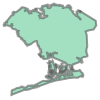

In [239]:
boroughs_shapes[0]

[This stackoverflow answer](https://stackoverflow.com/a/58415943/5394724) showed me how to get a random point from within the boundaries.

In [240]:
#shape = shapely.wkt.loads(boroughs_shapes[0])
minx, miny, maxx, maxy = boroughs_shapes[0].bounds

In [241]:
minx

-73.96262015898652

# NOTE: IF YOU'D LIKE TO REPLICATED THE MODELING WITH THE RANDOM POINTS USED IN THE ORIGINAL ANALYSIS, YOU CAN SKIP THIS SECTION. I'VE NOTED BELOW WHERE YOU CAN PICK UP.

## Selecting Random Points From Within Boroughs

note: x is longitude and y is latitude

In [242]:
permits = []
for i in range(5):
    count = 0
    while count <21:
        xmin, ymin, xmax, ymax = boroughs_shapes[i].bounds
        name = boundaries['BoroName'][i].upper()
        x = random.uniform(xmin, xmax)
        y = random.uniform(ymin, ymax)
        if Point(x, y).within(boroughs_shapes[i]):
            count +=1
            item = [name, x, y]
            permits.append(item)

In [243]:
permits[:5]

[['QUEENS', -73.7855335577568, 40.7715144229374],
 ['QUEENS', -73.85593106765072, 40.758834062345116],
 ['QUEENS', -73.77573911452649, 40.6929707352865],
 ['QUEENS', -73.93685845666981, 40.55611994836911],
 ['QUEENS', -73.82267906178208, 40.751981120729766]]

In [244]:
permits = pd.DataFrame(permits, columns = ['borough', 'longitude', 'latitude'])

In [245]:
permits.head()

,borough,longitude,latitude
0,QUEENS,-73.785534,40.771514
1,QUEENS,-73.855931,40.758834
2,QUEENS,-73.775739,40.692971
3,QUEENS,-73.936858,40.556120
4,QUEENS,-73.822679,40.751981


In [246]:
# backing up the random points
permits.to_csv('data/random_points.csv', index = False)

## Eliminating Points That Fall Inside Parks

In [422]:
permits.loc[0, 'point'] = ''

In [423]:
for i in permits.index:
    permits.loc[i, 'point'] = shapely.geometry.Point(permits.loc[i, 'longitude'], permits.loc[i, 'latitude'])

/Users/lorendunn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [424]:
permits['in_park'] = 0

In [425]:
parks = pd.read_csv('data/parks.csv')

In [426]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [427]:
t0 = time.time()

for i in range(len(parks)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(parks.loc[i,'multipolygon'])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in permits.index:
        if permits.loc[n, 'in_park'] == 0:
            point = permits.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    permits.loc[n, 'in_park'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.010547161102294922
Time to run the 0 loop: 0.0100860595703125

1
Time from start to end of 1 loop: 0.012855052947998047
Time to run the 1 loop: 0.002045154571533203

2
Time from start to end of 2 loop: 0.014641284942626953
Time to run the 2 loop: 0.001886129379272461

3
Time from start to end of 3 loop: 0.016977310180664062
Time to run the 3 loop: 0.002279043197631836

4
Time from start to end of 4 loop: 0.019153118133544922
Time to run the 4 loop: 0.0020759105682373047

5
Time from start to end of 5 loop: 0.02156805992126465
Time to run the 5 loop: 0.0023469924926757812

6
Time from start to end of 6 loop: 0.023589134216308594
Time to run the 6 loop: 0.002061128616333008

7
Time from start to end of 7 loop: 0.0253140926361084
Time to run the 7 loop: 0.0016469955444335938

8
Time from start to end of 8 loop: 0.02779221534729004
Time to run the 8 loop: 0.0024809837341308594

9
Time from start to end of 9 loop: 0.03000020980834961
Time to run the 9 l

In [428]:
permits.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0


In [429]:
permits.shape

(105, 5)

In [430]:
permits['in_park'].value_counts(dropna=False)

0    87
1    18
Name: in_park, dtype: int64

In [431]:
permits = permits[permits['in_park']==0]

In [432]:
permits.shape

(87, 5)

## Adding Features

for this (MUCH) smaller dataset, I'm going to try doing it against the whole complaints dataframe, not breaking it down by year or by borough.

In [433]:
nypd = pd.read_csv('../data_large_sets/nypd_min.csv')

In [434]:
nypd.head()

,boro_nm,latitude,longitude,addr_pct_cd
0,MANHATTAN,40.820927,-73.943324,32.0
1,BRONX,40.885701,-73.861640,47.0
2,QUEENS,40.742281,-73.819824,109.0
3,BRONX,40.875311,-73.847545,47.0
4,MANHATTAN,40.720759,-73.980466,9.0


In [435]:
nypd = nypd[['boro_nm', 'latitude', 'longitude']]

In [436]:
def get_distance(point1, point2):
    R = 4182 #miles
    lat1 = radians(point1[0])  #insert value
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance


# note: the latitude and longitude I'm using are in decimals NOT minutes, so I do the same here
# these are set at a tenth of a mile to start, with 1 degree late = 69 miles and 1 degree longitude = 40 miles
#max_delt_lat = 1/690
#max_delt_long = 1/400
#hard coded to save time


t0 = time.time()
for i in permits.index:
    t1 = time.time()
    print(f'Index {i} started')
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    complaint_count = 0
    for n in nypd.index:
        #if permits.loc[i, 'borough'] == nypd.loc[n, 'boro_nm']: #<-- I experimented with this to see what ran fastest. Out seems faster.
        n_lat = nypd.loc[n, 'latitude']
        n_long = nypd.loc[n, 'longitude']
        if (abs(lat - n_lat)<= 1/690) or (abs(lat - n_long)<= 1/400):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .1:
                complaint_count += 1
    permits.loc[i, 'total_complaints'] = complaint_count
    print(f"For index {i}, the complaint count was {complaint_count}")
    print(f"Permit {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of the code.")

print('')
print("Time to run", time.time()-t0)

Index 0 started
For index 0, the complaint count was 24
Permit 0 finished at 1660716274.449044, after 31.458824157714844, 31.459223747253418 since the start of the code.
Index 1 started
For index 1, the complaint count was 109
Permit 1 finished at 1660716305.166445, after 30.717360734939575, 62.176623821258545 since the start of the code.
Index 2 started
For index 2, the complaint count was 94
Permit 2 finished at 1660716335.800534, after 30.63407278060913, 92.81071281433105 since the start of the code.
Index 3 started
For index 3, the complaint count was 0
Permit 3 finished at 1660716366.424448, after 30.623902082443237, 123.43462681770325 since the start of the code.
Index 4 started
For index 4, the complaint count was 420
Permit 4 finished at 1660716397.189696, after 30.76522397994995, 154.19987893104553 since the start of the code.
Index 6 started
For index 6, the complaint count was 2158
Permit 6 finished at 1660716427.8794508, after 30.689722061157227, 184.8896288871765 since the

In [437]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0


In [438]:
permits.to_csv('../backup_data/test_points_complaints.csv', index = False)

### A Note on the Complaints Code
Finding number of proximate complaints is very timing consuming. For that reason I experimented with the timing of a few variations on it here.

I let it run without an if statement for borough, first. I interrupted it to try adding in that if statement. There's a cost to the if statement, but I hoped it skips enough nypd entries to be worth it. It turns out it doesn't. I tried eliminating the other test, too, for minimum distance. It turns out it's faster with the test for minimum distance than without it.

These are the times I got without the "if" statement to test for borough:
Index 0 started
Permit 0 finished at 1660222870.374628, after 86.14017605781555, 86.14065313339233 since the start of the code.
Index 1 started
Permit 1 finished at 1660222957.175935, after 86.79480314254761, 172.94195938110352 since the start of the code.
Index 2 started
Permit 2 finished at 1660223343.891807, after 386.7158260345459, 559.6579682826996 since the start of the code.
Index 3 started

This is with the "if" statement to test for borough:
Index 0 started
For index 0, the complaint count was 271
Permit 0 finished at 1660223678.587029, after 100.03797507286072, 100.03853106498718 since the start of the code.
Index 1 started
For index 1, the complaint count was 329
Permit 1 finished at 1660223778.4895098, after 99.90246081352234, 199.94101214408875 since the start of the code.
Index 2 started

This is without the test for distance:
Index 0 started
For index 0, the complaint count was 271
Permit 0 finished at 1660223973.503666, after 93.92348909378052, 93.92384696006775 since the start of the code.
Index 1 started

In [439]:
permits = pd.read_csv('../backup_data/test_points_complaints.csv')

In [440]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0


## Subway Entrances
I found the closest subway entrance and line. I also decided to look at the numbers of entrances within tenth, half, one, and 2.5 mile radii of the permit.

In [441]:
subways = pd.read_csv('data/subway_cleaned.csv')

In [442]:
subways.head()

,objectid,name,line,latitude,longitude
0,1734,Birchall Ave & Sagamore St at NW corner,2-5,40.849169,-73.868356
1,1735,Birchall Ave & Sagamore St at NE corner,2-5,40.849128,-73.868213
2,1736,Morris Park Ave & 180th St at NW corner,2-5,40.841223,-73.873499
3,1737,Morris Park Ave & 180th St at NW corner,2-5,40.841453,-73.872892
4,1738,Boston Rd & 178th St at SW corner,2-5,40.840815,-73.879623


### Closest Subway Entrance

In [443]:
def get_distance(point1, point2):
    R = 4182 #miles
    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance


t0 = time.time()
for i in permits.index:
    t1 = time.time()
    print(f'Index {i} started')
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    close_subway = 99999
    close_line = ''
    
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        point2 = [n_lat, n_long]
        distance = get_distance(point1, point2)
        if distance < close_subway:
            close_subway = distance
            close_line = subways.loc[n, 'line']
    
    permits.loc[i, 'closest_subway'] = close_subway
    permits.loc[i, 'closest_subway_line'] = close_line
        
    print(f"For index {i}, the closeste entrance is {permits.loc[i, 'closest_subway']} miles and the line is {permits.loc[i, 'closest_subway_line']}")
    print(f"Permit {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of the code.")

print('')
print("Time to run", time.time()-t0)

Index 0 started
For index 0, the closeste entrance is 2.5154567678321995 miles and the line is 7
Permit 0 finished at 1660734289.0994902, after 0.038949012756347656, 0.039221763610839844 since the start of the code.
Index 1 started
For index 1, the closeste entrance is 0.5273338814498879 miles and the line is 7
Permit 1 finished at 1660734289.1270049, after 0.02749919891357422, 0.06673574447631836 since the start of the code.
Index 2 started
For index 2, the closeste entrance is 1.4868667357831549 miles and the line is F
Permit 2 finished at 1660734289.1538749, after 0.026855945587158203, 0.09360671043395996 since the start of the code.
Index 3 started
For index 3, the closeste entrance is 2.042304940947976 miles and the line is B-Q
Permit 3 finished at 1660734289.178923, after 0.025027990341186523, 0.11865377426147461 since the start of the code.
Index 4 started
For index 4, the closeste entrance is 0.6622032709997355 miles and the line is 7
Permit 4 finished at 1660734289.203399, aft

### Count of Subway Entrances Within Given Radii

In [444]:
# note: the lati../backup_data/and longitude I'm using are in decimals NOT minutes, so I do the same here
# these are set at a tenth of a mile to start, with 1 degree late = 69 miles and 1 degree longitude = 40 miles
max_delt_lat = 1/690 #CHANGE HERE
max_delt_long = 1/400 #CHANGE HERE

t0 = time.time()
print("Tenth mile started ", t0)
permits.loc[i, 'subway_count_tenth_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .1: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_tenth_mi'] = entrance_count #CHANGE HERE

print("Time to run tenth mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 5/690 #CHANGE HERE
max_delt_long = 5/400 #CHANGE HERE

t0 = time.time()
print("Half mile started ", t0)
permits.loc[i, 'subway_count_half_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= .5: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_half_mi'] = entrance_count #CHANGE HERE


print("Time to run half mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 10/690 #CHANGE HERE
max_delt_long = 10/400 #CHANGE HERE

t0 = time.time()
print("Mile started ", t0)
permits.loc[i, 'subway_count_one_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= 1: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_one_mi'] = entrance_count #CHANGE HERE

print("Time to run one mile:", time.time()-t0) #CHANGE HERE
print('')

max_delt_lat = 25/690 #CHANGE HERE
max_delt_long = 25/400 #CHANGE HERE

t0 = time.time()
print("2.5 mile started ", t0)
permits.loc[i, 'subway_count_two_five_mi'] = 0 #CHANGE HERE
for i in permits.index:
    lat = permits.loc[i, 'latitude']
    long = permits.loc[i, 'longitude']
    point1 = [lat, long]
    entrance_count = 0
    for n in subways.index:
        n_lat = subways.loc[n, 'latitude']
        n_long = subways.loc[n, 'longitude']
        if (abs(lat - n_lat)<= max_delt_lat) or (abs(lat - n_long)<= max_delt_long):
            point2 = [n_lat, n_long]
            distance = get_distance(point1, point2)
            if distance <= 2.5: #CHANGE HERE
                entrance_count += 1
    permits.loc[i, 'subway_count_two_five_mi'] = entrance_count #CHANGE HERE

print("Time to run 2.5 mile:", time.time()-t0) #CHANGE HERE
print('')

Tenth mile started  1660734294.843482
Time to run tenth mile: 1.8872089385986328

Half mile started  1660734296.730856
Time to run half mile: 1.8627829551696777

Mile started  1660734298.593805
Time to run one mile: 1.8672518730163574

2.5 mile started  1660734300.4612212
Time to run 2.5 mile: 1.912813663482666



## Historic Districts
Determining if a permit is located in a historic district.

In [445]:
for i in permits.index:
    permits.loc[i, 'hist_dist_name'] = 'none'

for i in permits.index:
    permits.loc[i, 'in_hist_dist'] = 0

In [446]:
historic_dists = pd.read_csv('../data_large_sets/LPC_HD_OpenData_2015Nov.csv')

In [447]:
historic_dists.columns

Index(['the_geom', 'BOROUGH', 'LP_NUMBER', 'CURRENT_', 'AREA_NAME',
       'EXTENSION', 'STATUS_OF_', 'LAST_ACTIO', 'BOUNDARY_N', 'PUBLIC_HEA',
       'OTHER_HEAR', 'DESDATE', 'CALDATE', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [448]:
historic_dists.columns = historic_dists.columns.str.lower()

In [449]:
historic_dists.head()

,the_geom,borough,lp_number,current_,area_name,extension,status_of_,last_actio,boundary_n,public_hea,other_hear,desdate,caldate,shape_leng,shape_area
0,MULTIPOLYGON (((-73.78070476564865 40.79368791...,QN,LP-02040,Yes,Fort Totten Historic District,No,DESIGNATED,DESIGNATED,NaN,5/4/1999,NaN,6/29/1999,4/13/1999,11203.199722,4.067523e+06
1,MULTIPOLYGON (((-73.9545180987722 40.781621828...,MN,LP-01985,Yes,Hardenbergh/Rhinelander Historic District,No,DESIGNATED,DESIGNATED,NaN,3/10/1998,NaN,5/5/1998,NaN,410.860307,1.065242e+04
2,MULTIPOLYGON (((-74.00855983447059 40.71123470...,MN,LP-01901,Yes,African Burial Ground & The Commons Historic D...,No,DESIGNATED,DESIGNATED,NaN,9/1/1992,NaN,2/25/1993,NaN,4995.471462,1.069203e+06
3,MULTIPOLYGON (((-73.9595480661095 40.648261608...,BK,LP-00989,Yes,Albemarle-Kenmore Terraces Historic District,No,DESIGNATED,DESIGNATED,NaN,1/10/1978,NaN,7/11/1978,NaN,1240.770438,7.854686e+04
4,MULTIPOLYGON (((-73.96103396183 40.65868182663...,BK,LP-02567,Yes,Chester Court Historic District,No,DESIGNATED,DESIGNATED,AS IDENTIFIED BY RESEARCH DEPARTMENT (AND DETE...,11/25/2014,NaN,12/16/2014,10/28/2014,803.900855,3.840307e+04


In [450]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0,2.515457,7,0.0,0.0,0.0,0.0,none,0.0
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0,0.527334,7,0.0,0.0,11.0,69.0,none,0.0
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0,1.486867,F,0.0,0.0,0.0,52.0,none,0.0
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0,2.042305,B-Q,0.0,0.0,0.0,16.0,none,0.0
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0,0.662203,7,0.0,0.0,10.0,24.0,none,0.0


### Apparent Change in DataType in `permits['point'`
Between the last use of the `permits[point]` while eliminating the points that fall inside parks and this point, it appears that the `permits['point']` column changed from a geometry form back to a string. It's not clear to me why. This cell is set up to treat `permits['point']` as a string. If when you run this, an error occurs, please remove `shapely.wkt.loads()` from around `permits.loc[n, point]`.

In [452]:
t0 = time.time()

for i in range(len(historic_dists)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(historic_dists['the_geom'][i])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in permits.index:
        if permits.loc[n, 'in_hist_dist'] != 1:
            point = shapely.wkt.loads(permits.loc[n, 'point'])
            if bounding_box.contains(point):
                if shape.contains(point):
                    permits.loc[n, 'in_hist_dist'] = 1
                    permits.loc[n, 'hist_dist_name'] = historic_dists.loc[i, 'area_name']
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.008575916290283203
Time to run the 0 loop: 0.007874011993408203

1
Time from start to end of 1 loop: 0.012472867965698242
Time to run the 1 loop: 0.003665924072265625

2
Time from start to end of 2 loop: 0.01601696014404297
Time to run the 2 loop: 0.0035181045532226562

3
Time from start to end of 3 loop: 0.019565820693969727
Time to run the 3 loop: 0.003551006317138672

4
Time from start to end of 4 loop: 0.02347397804260254
Time to run the 4 loop: 0.0038421154022216797

5
Time from start to end of 5 loop: 0.027193784713745117
Time to run the 5 loop: 0.003728151321411133

6
Time from start to end of 6 loop: 0.031186819076538086
Time to run the 6 loop: 0.003983020782470703

7
Time from start to end of 7 loop: 0.03482484817504883
Time to run the 7 loop: 0.0036001205444335938

8
Time from start to end of 8 loop: 0.04062390327453613
Time to run the 8 loop: 0.005754947662353516

9
Time from start to end of 9 loop: 0.044058799743652344
Time to run the 9

In [453]:
permits["in_hist_dist"].value_counts()

0.0    83
1.0     4
Name: in_hist_dist, dtype: int64

## Distance to Parks
I want to know how far the closest park is. I also want to know how many parks are within a given distance. I plan to use .1, .5, 1, and 2.5 miles as I did for the subway stops.

[This stackoverflow question](https://stackoverflow.com/questions/33311616/find-coordinate-of-the-closest-point-on-polygon-in-shapely) itself actually showed me that `point.distance()` will get me what I want.

This is very similar to the historic districts, but now I'm looking at distance from, not whether or not it falls within.

In [454]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [455]:
parks_shapes = shape_list(parks['multipolygon'])

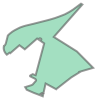

In [456]:
parks_shapes[0]

### Turning Distance Calcuation into Miles
This distance is in degrees. 1 degree latitude ~= to 69 miles. 1 degree longitude ~= 40 miles at NYC's latitude.

I'm going to treat a degree as equal to 54.5 miles, the average of the lengths of the two different kinds of degrees, for the purpose of these distance calculations. This means that my calculations of distance could be off by as much as 36.25%, if the change in position is actually only a change in longitude, latitude staying the same (in other words, 1 degree change actually equaling 40 miles). For a change only in latitude (longitude staying the same), the error rate is 21%.

Unfortunately, given the time line I'm on, I'm going to accept this level of imprecision. 

I tested the code on the following two entries from parks and from permits. My calculation of 14.13 miles is reasonably accurate.

I used [this website](https://www.mapdevelopers.com/distance_from_to.php) to the straight line distance between the two _addresses_ and got 16.67 miles, which is close. It's also important to note that the closest edge of the park is actually nearer to the site in permits than the location of the street address of the park. So it appears that this code is working in the right direction.

### Apparent Change in DataType in `permits['point'`
Again, it appears that the `permits['point']` column changed from a geometry form back to a string. It's not clear to me why. This cell is set up to treat `permits['point']` as a string. If when you run this, an error occurs, please remove `shapely.wkt.loads()` from around `permits.loc[n, point]`.

In [457]:
t0 = time.time()

for i in permits.index:
    t1 = time.time()
    print(f'Permit {i} started.')
    point = shapely.wkt.loads(permits['point'][i])
    close_park = 99999
    name_close_park = ''
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < close_park:
            close_park = distance
            name_close_park = parks.loc[n, 'name311']
    permits.loc[i, 'closest_park'] = close_park
    permits.loc[i, 'name_closest_park'] = name_close_park
    print(f"Permit {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of the permit {i} code.")
print(f'Time to complete code: {time.time()-t0}') 

Permit 0 started.
Permit 0 finished at 1660734398.541022, after 0.024474143981933594, 0.025000333786010742 since the start of the permit 0 code.
Permit 1 started.
Permit 1 finished at 1660734398.551063, after 0.009948968887329102, 0.035041093826293945 since the start of the permit 1 code.
Permit 2 started.
Permit 2 finished at 1660734398.5607219, after 0.009523868560791016, 0.044701337814331055 since the start of the permit 2 code.
Permit 3 started.
Permit 3 finished at 1660734398.570007, after 0.009202003479003906, 0.05398821830749512 since the start of the permit 3 code.
Permit 4 started.
Permit 4 finished at 1660734398.579565, after 0.00933980941772461, 0.06354308128356934 since the start of the permit 4 code.
Permit 5 started.
Permit 5 finished at 1660734398.58882, after 0.009135007858276367, 0.07279801368713379 since the start of the permit 5 code.
Permit 6 started.
Permit 6 finished at 1660734398.598016, after 0.009096145629882812, 0.08199310302734375 since the start of the permi

Looking at some of these to make sure they make sense... They line up. Interestingly, the Malls on Broadway are considered a park. So an address on Broadway is considered to be at a park.

In [458]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0,2.515457,7,0.0,0.0,0.0,0.0,none,0.0,0.062100,Bayside Fields
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0,0.527334,7,0.0,0.0,11.0,69.0,none,0.0,0.017887,Grand Central Parkway Extension
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0,1.486867,F,0.0,0.0,0.0,52.0,Addisleigh Park Historic District,1.0,0.098418,Archie Spigner Park
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0,2.042305,B-Q,0.0,0.0,0.0,16.0,none,0.0,1.071045,Manhattan Beach Park
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0,0.662203,7,0.0,0.0,10.0,24.0,none,0.0,0.076158,Kissena Corridor Park


## Parks within a given radius

### Apparent Change in DataType in `permits['point'`
Again, it appears that the `permits['point']` column changed from a geometry form back to a string. It's not clear to me why. This cell is set up to treat `permits['point']` as a string. If when you run this, an error occurs, please remove `shapely.wkt.loads()` from around `permits.loc[n, point]`.

In [460]:
# note: the lati../backup_data/and longitude I'm using are in decimals NOT minutes, so I do the same here
# these are set at a tenth of a mile to start, with 1 degree lat = 69 miles and 1 degree longitude = 40 miles
max_delt_lat = 1/690 #CHANGE HERE
max_delt_long = 1/400 #CHANGE HERE

t0 = time.time()
print("Tenth mile started ", t0)
for i in permits.index:

    count = 0
    point = shapely.wkt.loads(permits.loc[i, 'point'])
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < .1: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_tenth_mi'] = count #CHANGE HERE

print("Time to run tenth mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 5/690 #CHANGE HERE
max_delt_long = 5/400 #CHANGE HERE

t0 = time.time()
print("Half mile started ", t0)
for i in permits.index:
    
    count = 0
    point = shapely.wkt.loads(permits.loc[i, 'point'])
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < .5: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_half_mi'] = count #CHANGE HERE

print("Time to run half mile:", time.time()-t0) #CHANGE HERE
print('')


max_delt_lat = 10/690 #CHANGE HERE
max_delt_long = 10/400 #CHANGE HERE

t0 = time.time()
print("Mile started ", t0)
for i in permits.index:

    count = 0
    point = shapely.wkt.loads(permits.loc[i, 'point'])
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < 1: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_one_mi'] = count #CHANGE HERE

print("Time to run one mile:", time.time()-t0) #CHANGE HERE
print('')

max_delt_lat = 25/690 #CHANGE HERE
max_delt_long = 25/400 #CHANGE HERE

t0 = time.time()
print("2.5 mile started ", t0)
for i in permits.index:

    count = 0
    point = shapely.wkt.loads(permits.loc[i, 'point'])
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < 2.5: # CHANGE HERE
            count += 1
    permits.loc[i, 'park_count_two_five_mi'] = count #CHANGE HERE

print("Time to run 2.5 mile:", time.time()-t0) #CHANGE HERE
print('')

Tenth mile started  1660734456.574156
Time to run tenth mile: 0.6900389194488525

Half mile started  1660734457.2643552
Time to run half mile: 0.7161247730255127

Mile started  1660734457.980671
Time to run one mile: 0.7244141101837158

2.5 mile started  1660734458.7052538
Time to run 2.5 mile: 0.6794161796569824



In [461]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0,2.515457,7,0.0,0.0,0.0,0.0,none,0.0,0.062100,Bayside Fields,1.0,4.0,17.0,68.0
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0,0.527334,7,0.0,0.0,11.0,69.0,none,0.0,0.017887,Grand Central Parkway Extension,2.0,7.0,24.0,126.0
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0,1.486867,F,0.0,0.0,0.0,52.0,Addisleigh Park Historic District,1.0,0.098418,Archie Spigner Park,1.0,3.0,20.0,81.0
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0,2.042305,B-Q,0.0,0.0,0.0,16.0,none,0.0,1.071045,Manhattan Beach Park,0.0,0.0,0.0,24.0
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0,0.662203,7,0.0,0.0,10.0,24.0,none,0.0,0.076158,Kissena Corridor Park,1.0,4.0,17.0,104.0


## Census Tract Data
I add details on the demographics of the census tract the permit falls in. For some of these, I use absolute numbers, and for sum, percentages. The percentages are represented out of 100, not 1, so I adjust accordingly.

In [462]:
census_data = pd.read_csv('data/cleaned_census_data.csv')

In [463]:
census_data.shape

(2327, 33)

In [464]:
census_data.head()

,geotype,borough,geoid,bct2020,pop_20,pop_20p,hhpop_20,hhpop_20p,gq_20,gq_20p,instgq_20,instgq_20p,avhhsz_20,popu18_20,popu18_20p,hsp_20,hsp_20p,wnh_20,wnh_20p,bnh_20,bnh_20p,anh_20,anh_20p,onh_20,onh_20p,nh2pl_20,nh2pl_20p,hunits_20,hunits_20p,ochu_20,ochu_20p,vachu_20,vachu_20p
0,CT2020,Bronx,36005000100,2000100,3772,1.0,27,0.007,"3,745",0.993,"3,745",0.993,0.00,12,0.003,"1,259",0.334,260,0.069,"2,172",0.576,59,0.016,12,0.003,10,0.003,1,1.0,0,0.000,1,1.000
1,CT2020,Bronx,36005000200,2000200,4779,1.0,"4,771",0.998,8,0.002,0,0.000,3.15,"1,065",0.223,"3,173",0.664,152,0.032,"1,011",0.212,202,0.042,115,0.024,126,0.026,1594,1.0,"1,517",0.952,77,0.048
2,CT2020,Bronx,36005000400,2000400,6272,1.0,"6,258",0.998,14,0.002,0,0.000,2.97,"1,337",0.213,"3,972",0.633,238,0.038,"1,592",0.254,230,0.037,91,0.015,149,0.024,2200,1.0,"2,110",0.959,90,0.041
3,CT2020,Bronx,36005001600,2001600,5795,1.0,"5,565",0.960,230,0.040,205,0.035,2.73,"1,251",0.216,"3,479",0.600,121,0.021,"1,884",0.325,122,0.021,81,0.014,108,0.019,2129,1.0,"2,042",0.959,87,0.041
4,CT2020,Bronx,36005001901,2001901,2292,1.0,"2,258",0.985,34,0.015,0,0.000,2.29,567,0.247,"1,089",0.475,250,0.109,803,0.350,39,0.017,35,0.015,76,0.033,1049,1.0,988,0.942,61,0.058


In [465]:
to_use = ['bct2020', 'pop_20', 'hhpop_20p', 'gq_20p', 'instgq_20p', 'avhhsz_20', 'popu18_20p', 'hsp_20p', 'wnh_20p', 'bnh_20p', 'anh_20p', 'onh_20p', 'nh2pl_20p', 'hunits_20', 'ochu_20p', 'vachu_20p']


In [466]:
census_data.shape

(2327, 33)

In [467]:
census_data = census_data[to_use]

In [468]:
census_data.shape

(2327, 16)

In [470]:
census_data.head()

,bct2020,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
0,2000100,3772,0.007,0.993,0.993,0.00,0.003,0.334,0.069,0.576,0.016,0.003,0.003,1,0.000,1.000
1,2000200,4779,0.998,0.002,0.000,3.15,0.223,0.664,0.032,0.212,0.042,0.024,0.026,1594,0.952,0.048
2,2000400,6272,0.998,0.002,0.000,2.97,0.213,0.633,0.038,0.254,0.037,0.015,0.024,2200,0.959,0.041
3,2001600,5795,0.960,0.040,0.035,2.73,0.216,0.600,0.021,0.325,0.021,0.014,0.019,2129,0.959,0.041
4,2001901,2292,0.985,0.015,0.000,2.29,0.247,0.475,0.109,0.350,0.017,0.015,0.033,1049,0.942,0.058


## Placing Random Points In Their Tracts

In [471]:
census_tracts = pd.read_csv('../data_large_sets/2020_Census_Tracts_-_Tabular.csv')

In [472]:
census_tracts.head()

,the_geom,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-74.04387761639944 40.69018767...,1.00,1,Manhattan,100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.048501,1.844421e+06
1,MULTIPOLYGON (((-73.98449647076764 40.70950966...,2.01,1,Manhattan,201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495250,9.723121e+05
2,MULTIPOLYGON (((-73.98237340572007 40.70554335...,2.02,1,Manhattan,202,1000202,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000202,8568.089429,3.315114e+06
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,5.00,1,Manhattan,500,1000500,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000500,32642.083745,9.083214e+06
4,MULTIPOLYGON (((-73.99022012669926 40.71440493...,6.00,1,Manhattan,600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286456,2.582705e+06


In [473]:
census_tracts.columns = census_tracts.columns.str.lower()

## Building Census Tract Shapes

In [474]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [475]:
census_shapes = shape_list(census_tracts['the_geom'])

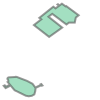

In [476]:
census_shapes[0]

In [480]:
permits['bct2020'] = ''

### Apparent Change in DataType in `permits['point'`
Again, it appears that the `permits['point']` column changed from a geometry form back to a string. It's not clear to me why. This cell is set up to treat `permits['point']` as a string. If when you run this, an error occurs, please remove `shapely.wkt.loads()` from around `permits.loc[n, point]`.

In [481]:
t0 = time.time()

for i in range(0, len(census_shapes)):
    print(i)
    t1 = time.time()
    shape = census_shapes[i]
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in permits.index:
        if permits.loc[n, 'bct2020'] == '':
            point = shapely.wkt.loads(permits.loc[n, 'point'])
            if bounding_box.contains(point):
                if shape.contains(point):
                    permits.loc[n, 'bct2020'] = census_tracts['boroct2020'][i]
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.00998687744140625
Time to run the 0 loop: 0.00880575180053711

1
Time from start to end of 1 loop: 0.013717889785766602
Time to run the 1 loop: 0.0036520957946777344

2
Time from start to end of 2 loop: 0.01720285415649414
Time to run the 2 loop: 0.003358125686645508

3
Time from start to end of 3 loop: 0.020762920379638672
Time to run the 3 loop: 0.0035588741302490234

4
Time from start to end of 4 loop: 0.02422189712524414
Time to run the 4 loop: 0.003458738327026367

5
Time from start to end of 5 loop: 0.027109861373901367
Time to run the 5 loop: 0.002794027328491211

6
Time from start to end of 6 loop: 0.031109094619750977
Time to run the 6 loop: 0.00403594970703125

7
Time from start to end of 7 loop: 0.03536081314086914
Time to run the 7 loop: 0.004127025604248047

8
Time from start to end of 8 loop: 0.03892087936401367
Time to run the 8 loop: 0.0035161972045898438

9
Time from start to end of 9 loop: 0.0424807071685791
Time to run the 9 loop

## Adding Census Data to Random Points

In [482]:
permits['bct2020'] = permits['bct2020'].astype(int)

In [483]:
permits = permits.merge(census_data, on= 'bct2020')

In [484]:
permits.head()

,borough,longitude,latitude,point,in_park,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,bct2020,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
0,QUEENS,-73.785534,40.771514,POINT (-73.7855335577568 40.7715144229374),0,24.0,2.515457,7,0.0,0.0,0.0,0.0,none,0.0,0.062100,Bayside Fields,1.0,4.0,17.0,68.0,4108500,2778,0.994,0.006,0.0,2.81,0.193,0.143,0.406,0.006,0.426,0.005,0.014,1040,0.944,0.056
1,QUEENS,-73.855931,40.758834,POINT (-73.85593106765072 40.75883406234512),0,109.0,0.527334,7,0.0,0.0,11.0,69.0,none,0.0,0.017887,Grand Central Parkway Extension,2.0,7.0,24.0,126.0,4037300,2887,1.000,0.000,0.0,3.65,0.237,0.755,0.017,0.123,0.079,0.010,0.016,870,0.909,0.091
2,QUEENS,-73.775739,40.692971,POINT (-73.77573911452649 40.6929707352865),0,94.0,1.486867,F,0.0,0.0,0.0,52.0,Addisleigh Park Historic District,1.0,0.098418,Archie Spigner Park,1.0,3.0,20.0,81.0,4042400,2295,1.000,0.000,0.0,3.04,0.175,0.085,0.008,0.821,0.024,0.018,0.043,789,0.956,0.044
3,QUEENS,-73.936858,40.556120,POINT (-73.93685845666981 40.55611994836911),0,0.0,2.042305,B-Q,0.0,0.0,0.0,16.0,none,0.0,1.071045,Manhattan Beach Park,0.0,0.0,0.0,24.0,4091604,0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,0.000,1.000
4,QUEENS,-73.822679,40.751981,POINT (-73.82267906178208 40.751981120729766),0,420.0,0.662203,7,0.0,0.0,10.0,24.0,none,0.0,0.076158,Kissena Corridor Park,1.0,4.0,17.0,104.0,4084500,5516,1.000,0.000,0.0,2.62,0.158,0.172,0.050,0.082,0.677,0.006,0.013,2179,0.965,0.035


In [485]:
permits.drop(columns = ['point'], inplace = True)

In [486]:
permits.to_csv('../backup_data/test_data_not_dummified.csv', index = False)

In [487]:
permits['in_hist_dist'] = permits['in_hist_dist'].astype(int)

In [489]:
permits.drop(columns = ['in_park'], inplace = True)

In [490]:
test_dummified = pd.get_dummies(columns = ['borough', 'in_hist_dist'], drop_first = True, data = permits)
test_dummified.head()

,longitude,latitude,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,bct2020,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
0,-73.785534,40.771514,24.0,2.515457,7,0.0,0.0,0.0,0.0,none,0.062100,Bayside Fields,1.0,4.0,17.0,68.0,4108500,2778,0.994,0.006,0.0,2.81,0.193,0.143,0.406,0.006,0.426,0.005,0.014,1040,0.944,0.056,0,0,1,0,0
1,-73.855931,40.758834,109.0,0.527334,7,0.0,0.0,11.0,69.0,none,0.017887,Grand Central Parkway Extension,2.0,7.0,24.0,126.0,4037300,2887,1.000,0.000,0.0,3.65,0.237,0.755,0.017,0.123,0.079,0.010,0.016,870,0.909,0.091,0,0,1,0,0
2,-73.775739,40.692971,94.0,1.486867,F,0.0,0.0,0.0,52.0,Addisleigh Park Historic District,0.098418,Archie Spigner Park,1.0,3.0,20.0,81.0,4042400,2295,1.000,0.000,0.0,3.04,0.175,0.085,0.008,0.821,0.024,0.018,0.043,789,0.956,0.044,0,0,1,0,1
3,-73.936858,40.556120,0.0,2.042305,B-Q,0.0,0.0,0.0,16.0,none,1.071045,Manhattan Beach Park,0.0,0.0,0.0,24.0,4091604,0,0.000,0.000,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,0.000,1.000,0,0,1,0,0
4,-73.822679,40.751981,420.0,0.662203,7,0.0,0.0,10.0,24.0,none,0.076158,Kissena Corridor Park,1.0,4.0,17.0,104.0,4084500,5516,1.000,0.000,0.0,2.62,0.158,0.172,0.050,0.082,0.677,0.006,0.013,2179,0.965,0.035,0,0,1,0,0


In [85]:
test_dummified.to_csv('data/test_data.csv', index = False)

# TO REPLICATE THE ANALYSIS WITH THE TEST DATA POINTS USED IN THE ORIGINAL ANALYSIS, PICK UP HERE
Load in the data in the cell below.

In [262]:
#test_dummified = pd.read_csv('data/analysis_test_data.csv')

In [263]:
test = test_dummified.copy()

-----

# Developing Models With Data Available for Random Points
At this point, I develop models that use the features available for the random points. For example, there's no owner data available for those points.

# Features 3 - Building Model for Testing
There are some interesting features I don't have data for my test points (who owns, is it a nonprofit?)
I'm repeating the above with those features removed.

After eliminating problematic data I uncovered (2 points outside NYC that sleeped through), the max epsilon that leaves 1 cluster plus outliers is 13, with 2 clusters starting at epsilon = 11.

In [264]:
permits_for_testing = pd.read_csv('data/final_permits_for_testing.csv')

In [265]:
permits_for_testing.head()

,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,bct2020,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
0,1056547,2686,BROADWAY,121207354,10025,2022-05-11,PARTNERSHIP,N,40.798817,-73.968740,1019100,2255,0.033418,1,5,15,42,195,none,0.000000,Broadway Malls,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0
1,1812187,140,HILLSIDE AVENUE,121189524,10040,2022-05-11,CORPORATION,N,40.860296,-73.926125,1028300,701,0.085621,1,2,15,34,153,none,0.049425,Highbridge Park,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0
2,1091669,37,HILLSIDE AVENUE,121205445,10040,2021-02-19,PARTNERSHIP,N,40.858508,-73.929532,1028300,546,0.177308,A,0,6,35,146,none,0.115871,Fort Tryon Park,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0
3,2823631,368,EAST 152 STREET,220586168,10455,2022-05-11,INDIVIDUAL,N,40.818565,-73.918118,2006700,1578,0.167270,2-5,0,9,60,215,none,0.086285,Melrose Playground,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0
4,2129278,418,EAST 153 STREET,220593463,10455,2018-02-09,CORPORATION,N,40.818742,-73.915997,2006700,2368,0.196656,2-5,0,12,61,216,none,0.134117,P.S. 29 Ballfield,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0


In [266]:
permits_for_testing['real_permit'] = 1

In [267]:
permits_for_testing.shape

(7177, 46)

In [268]:
test.shape

(88, 38)

In [269]:
test['real_permit'] = 0

In [270]:
test.shape

(88, 38)

In [271]:
test_real_df = pd.concat([permits_for_testing, test])

In [272]:
test_real_df.shape

(7265, 46)

In [273]:
7177+88

7265

In [274]:
test_real_df.isnull().sum()

bin_no                      88
house_no                    88
street_name                 88
job_no                      88
zip_code                    88
job_start_date              88
owners_business_type        88
non-profit                  88
latitude                     0
longitude                    0
bct2020                      0
total_complaints             0
closest_subway               0
closest_subway_line          0
subway_count_tenth_mi        0
subway_count_half_mi         0
subway_count_one_mi          0
subway_count_two_five_mi     0
hist_dist_name               0
closest_park                 0
name_closest_park            0
park_count_tenth_mi          0
park_count_half_mi           0
park_count_one_mi            0
park_count_two_five_mi       0
pop_20                       0
hhpop_20p                    0
gq_20p                       0
instgq_20p                   0
avhhsz_20                    0
popu18_20p                   0
hsp_20p                      0
wnh_20p 

In [275]:
real_fake_array = test_real_df['real_permit']

In [329]:
to_drop3 = to_drop2 + ['owners_business_type', 'non-profit', 'real_permit']
to_drop3

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line',
 'bct2020',
 'owners_business_type',
 'non-profit',
 'real_permit']

-----

## Features 3 with Just Real Permits
I ran this first with just real permits.

In [277]:
permits_for_testing.shape

(7177, 46)

In [278]:
perms_use3 = permits_for_testing.drop(columns = to_drop3)
perms_use3.shape

(7177, 33)

In [279]:
X = perms_use3
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [280]:
features = 'features3' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1, the silhouette_score is 0.06404858714380669 and there are 299 clusters
For epsilon = 2, the silhouette_score is 0.03128967519841317 and there are 158 clusters
For epsilon = 3, the silhouette_score is 0.0566187826731054 and there are 47 clusters
For epsilon = 4, the silhouette_score is 0.12403851388293974 and there are 20 clusters
For epsilon = 5, the silhouette_score is 0.33888789388941204 and there are 10 clusters
For epsilon = 6, the silhouette_score is 0.3396261681897333 and there are 7 clusters
For epsilon = 7, the silhouette_score is 0.43775643686484295 and there are 4 clusters
For epsilon = 8, the silhouette_score is 0.43786217660634513 and there are 4 clusters
For epsilon = 9, the silhouette_score is 0.5455121680787776 and there are 3 clusters
For epsilon = 10, the silhouette_score is 0.5446703564107892 and there are 3 clusters
For epsilon = 11, the silhouette_score is 0.5462263852973287 and there are 2 clusters
For epsilon = 12, the silhouette_score is 0.546226

In [281]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287}

In [282]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

## Checking Out the 2 Cluster Epsilon

### NOTE: Uncovering Points That Aren't in NYC
While examing the 2 cluster epsilon values, I uncovered two points outside NYC that slipped through my cleaning. I went back to the features engineering data set (not having time to go back to see if I can fix the points at this stage in the work.)

The first time I ran these features, I found a point in Albany. Job no 420658176. Somehow it came in as being in Queens. It appears the longitude should have been 40.677346, not 42... . I need to drop this point in my data. Going back to clean up in feature engineering since I don't have time to go back and repair it. 

On rerunning with that point dropped, I found job_no 540197785, which is in Garden City, in Nassau County, not Queens.
After eliminating that, it appears that everything is truly within the NYC limits.

This work doesn't include those two points

-----

## Observations On The Two Clusters
Cluster 1 (42 observations) are all in historic districts. I believe that's the key differentiatior.

### Looking at averages for each cluster:
Compared to Cluster 0, Cluster 1 has/is:

- More subways nearby
- More parks nearby, with the closest park closer
- More criminal complaints
- Lower population.
- Higher household population rate, corresponding to lower group home rate.
- Lower rate of group home population (cluster 0: ~1.9%, cluster 2: ~1.5%)
- Higher rate of institutionalized people (though overall low percentage of population: cluster 0 ~.5%, cluster 1 ~.6%)
- Smaller average household size.
- Fewer people under 20.
- Racially, whiter, with more non-Hispanic multi-racial people.
- mostly in Brooklyn (47.6%), followed by Manhattan (34.7%), Queens (14.3%), and the Bronx (3.4%). There are no data points for permits in historic districts on Staten Island.

In [283]:
dbscan = DBSCAN(eps = 11)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.5462263852973287

In [284]:
pd.Series(dbscan.labels_).unique()

array([0, 1])

In [285]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{0: 7135, 1: 42}

In [286]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
0,40.798817,-73.968740,2255,0.033418,5,15,42,195,0.000000,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0
1,40.860296,-73.926125,701,0.085621,2,15,34,153,0.049425,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0
2,40.858508,-73.929532,546,0.177308,0,6,35,146,0.115871,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0
3,40.818565,-73.918118,1578,0.167270,0,9,60,215,0.086285,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0
4,40.818742,-73.915997,2368,0.196656,0,12,61,216,0.134117,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0


In [287]:
permits_X.groupby('cluster').mean()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,40.674583,-73.960177,348.014436,0.853513,0.221584,5.111703,17.757954,93.444149,0.152742,0.722635,9.733987,30.681710,145.006727,4409.639103,0.980734,0.019266,0.005118,2.776685,0.206825,0.241184,0.389683,0.182258,0.141612,0.014405,0.030835,1735.548283,0.930296,0.069704,0.304975,0.037141,0.289839,0.265732,0.0
1,40.724009,-73.944212,636.238095,0.692310,0.476190,24.523810,73.476190,284.047619,0.086968,0.976190,18.023810,62.261905,279.428571,4252.023810,0.984976,0.015048,0.005619,2.120238,0.145667,0.117976,0.538714,0.169714,0.115571,0.008833,0.049190,2309.333333,0.901524,0.098476,0.476190,0.357143,0.142857,0.000000,1.0


In [288]:
permits_X.groupby(['cluster']).mean()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,40.674583,-73.960177,348.014436,0.853513,0.221584,5.111703,17.757954,93.444149,0.152742,0.722635,9.733987,30.681710,145.006727,4409.639103,0.980734,0.019266,0.005118,2.776685,0.206825,0.241184,0.389683,0.182258,0.141612,0.014405,0.030835,1735.548283,0.930296,0.069704,0.304975,0.037141,0.289839,0.265732,0.0
1,40.724009,-73.944212,636.238095,0.692310,0.476190,24.523810,73.476190,284.047619,0.086968,0.976190,18.023810,62.261905,279.428571,4252.023810,0.984976,0.015048,0.005619,2.120238,0.145667,0.117976,0.538714,0.169714,0.115571,0.008833,0.049190,2309.333333,0.901524,0.098476,0.476190,0.357143,0.142857,0.000000,1.0


## Checking Out the 3 Cluster Epsilon

In [289]:
dbscan = DBSCAN(eps = 9)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.5455121680787776

In [290]:
pd.Series(dbscan.labels_).unique()

array([ 0,  1, -1])

In [291]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 3, 0: 7132, 1: 42}

In [292]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
0,40.798817,-73.968740,2255,0.033418,5,15,42,195,0.000000,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0
1,40.860296,-73.926125,701,0.085621,2,15,34,153,0.049425,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0
2,40.858508,-73.929532,546,0.177308,0,6,35,146,0.115871,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0
3,40.818565,-73.918118,1578,0.167270,0,9,60,215,0.086285,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0
4,40.818742,-73.915997,2368,0.196656,0,12,61,216,0.134117,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0


## Observations on the Clusters (2 Clusters and Outliers)
Cluster 1 is the same as for the 2 cluster epsilon. See observations above. 

Observations on Outliers.
2 of them (job nos 121185813 and 121191049) are extremely close to each other, possibly next door. Because they're so few and two of them are skewing the averages, I'm not going to look too closely.

Some observations. Outliers have:
- most/closest subways (by a significant scale)
- fewest closer parks, more parks than cluster 0 at 1 and 2.5 miles.
- furthest 'closest park'
- most criminal complaints by a large degree

In [293]:
permits_X.groupby('cluster').mean()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1,40.735862,-73.923913,900.666667,0.029034,9.333333,56.666667,142.333333,335.333333,0.170995,0.333333,8.000000,32.666667,183.333333,3985.666667,0.752667,0.247333,0.000000,2.310000,0.115667,0.304667,0.309000,0.082000,0.221667,0.043333,0.040333,1581.666667,0.852667,0.147333,0.000000,0.666667,0.333333,0.000000,0.0
0,40.674557,-73.960192,347.781969,0.853860,0.217751,5.090017,17.705552,93.342400,0.152735,0.722799,9.734717,30.680875,144.990606,4409.817443,0.980830,0.019170,0.005120,2.776882,0.206863,0.241158,0.389717,0.182300,0.141579,0.014392,0.030831,1735.613012,0.930329,0.069671,0.305104,0.036876,0.289821,0.265844,0.0
1,40.724009,-73.944212,636.238095,0.692310,0.476190,24.523810,73.476190,284.047619,0.086968,0.976190,18.023810,62.261905,279.428571,4252.023810,0.984976,0.015048,0.005619,2.120238,0.145667,0.117976,0.538714,0.169714,0.115571,0.008833,0.049190,2309.333333,0.901524,0.098476,0.476190,0.357143,0.142857,0.000000,1.0


In [294]:
permits_X[permits_X['cluster'] == -1]

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
369,40.712413,-73.783410,666,0.009898,16,16,24,55,0.065544,1,6,17,96,4173,0.996,0.004,0.0,3.45,0.203,0.206,0.035,0.096,0.471,0.114,0.079,1351,0.892,0.108,0,0,1,0,0,-1
6503,40.747544,-73.994063,1018,0.032286,6,77,202,476,0.229236,0,9,41,227,3892,0.631,0.369,0.0,1.74,0.072,0.354,0.446,0.075,0.097,0.008,0.021,1697,0.833,0.167,0,1,0,0,0,-1
6504,40.747629,-73.994265,1018,0.044918,6,77,201,475,0.218206,0,9,40,227,3892,0.631,0.369,0.0,1.74,0.072,0.354,0.446,0.075,0.097,0.008,0.021,1697,0.833,0.167,0,1,0,0,0,-1


-----

## Features 3 with Real and Test Permits
Now running ti with my real and my test permits combined to see if the test permits wind up in any exclusive clusters.

In [295]:
X = test_real_df.drop(columns = to_drop3)
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [296]:
best_scores_test = {}
best_eps_test = {}
best_params_test = {}

In [297]:
features = 'features3' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    for i in range(2, 7):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores_test[features] = max_score
best_eps_test[features] = best_eps_list
best_params_test[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is 0.35723322894032394 and there are 967 clusters
For epsilon = 1 and min samples 3, the silhouette_score is 0.23246769993691654 and there are 611 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.13625074619814895 and there are 418 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.06024392270727598 and there are 303 clusters
For epsilon = 1 and min samples 6, the silhouette_score is 0.004732283474292076 and there are 235 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.06302634344935772 and there are 362 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.029801174415434013 and there are 232 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.015895708424929732 and there are 178 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.003594113683793074 and there are 137 clusters
For epsilon = 2 and min samples 6, the sil

In [298]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287}

In [299]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

Going to try eps = 5, min_samples = 2 --> 21 clusters

In [300]:
dbscan = DBSCAN(eps = 5, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=5, min_samples=2)

In [301]:
dbscan.labels_

array([ 0,  0,  0, ...,  1, -1,  1])

In [302]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 39,
 0: 243,
 1: 6747,
 2: 20,
 3: 2,
 4: 4,
 5: 2,
 6: 5,
 7: 5,
 8: 6,
 9: 150,
 10: 10,
 11: 2,
 12: 5,
 13: 11,
 14: 2,
 15: 3,
 16: 3,
 17: 2,
 18: 2,
 19: 2}

In [303]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,40.798817,-73.968740,2255.0,0.033418,5.0,15.0,42.0,195.0,0.000000,2.0,17.0,33.0,214.0,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0,1
1,40.860296,-73.926125,701.0,0.085621,2.0,15.0,34.0,153.0,0.049425,1.0,10.0,42.0,280.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
2,40.858508,-73.929532,546.0,0.177308,0.0,6.0,35.0,146.0,0.115871,0.0,11.0,41.0,275.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
3,40.818565,-73.918118,1578.0,0.167270,0.0,9.0,60.0,215.0,0.086285,1.0,32.0,93.0,418.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,1,1
4,40.818742,-73.915997,2368.0,0.196656,0.0,12.0,61.0,216.0,0.134117,0.0,32.0,90.0,422.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,1,1


In [304]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       1                21
         0                18
 0       1               235
         0                 8
 1       1              6685
         0                62
 2       1                20
 3       1                 2
 4       1                 4
 5       1                 2
 6       1                 5
 7       1                 5
 8       1                 6
 9       1               150
 10      1                10
 11      1                 2
 12      1                 5
 13      1                11
 14      1                 2
 15      1                 3
 16      1                 3
 17      1                 2
 18      1                 2
 19      1                 2
Name: real_permit, dtype: int64

Attempting with eps = 1, min_samples = 2 --> 967 clusters

In [305]:
dbscan = DBSCAN(eps = 1, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=1, min_samples=2)

In [306]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [307]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,40.798817,-73.968740,2255.0,0.033418,5.0,15.0,42.0,195.0,0.000000,2.0,17.0,33.0,214.0,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,-1,1
1,40.860296,-73.926125,701.0,0.085621,2.0,15.0,34.0,153.0,0.049425,1.0,10.0,42.0,280.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,-1,1
2,40.858508,-73.929532,546.0,0.177308,0.0,6.0,35.0,146.0,0.115871,0.0,11.0,41.0,275.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,-1,1
3,40.818565,-73.918118,1578.0,0.167270,0.0,9.0,60.0,215.0,0.086285,1.0,32.0,93.0,418.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1
4,40.818742,-73.915997,2368.0,0.196656,0.0,12.0,61.0,216.0,0.134117,0.0,32.0,90.0,422.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,-1,1


In [308]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       1              1125
         0                63
 0       1                 2
 1       1                29
 2       1                 2
                        ... 
 961     1                 2
 962     1                 3
 963     1                 2
 964     1                 3
 965     0                 2
Name: real_permit, Length: 989, dtype: int64

In [309]:
test_real_X[test_real_X['real_permit'] == 0]['cluster'].value_counts()

-1      63
 119     3
 965     2
 739     1
 751     1
 744     1
 721     1
 393     1
 563     1
 308     1
 221     1
 5       1
 166     1
 224     1
 207     1
 459     1
 50      1
 225     1
 455     1
 480     1
 557     1
 882     1
 41      1
Name: cluster, dtype: int64

# Features 3, epsilon 13, min_samples = 2 separates 8 random points as outliers
Without knowing more about what rate of permitting to expect, it's very difficult to know how to interpret this. The fact that those 8 are outliers suggest it's just noise. They haven't actually been grouped together.

Epsilon 13, min_samples = 2

In [310]:
dbscan = DBSCAN(eps = 13, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=13, min_samples=2)

In [311]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [312]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,40.798817,-73.968740,2255.0,0.033418,5.0,15.0,42.0,195.0,0.000000,2.0,17.0,33.0,214.0,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0,1
1,40.860296,-73.926125,701.0,0.085621,2.0,15.0,34.0,153.0,0.049425,1.0,10.0,42.0,280.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
2,40.858508,-73.929532,546.0,0.177308,0.0,6.0,35.0,146.0,0.115871,0.0,11.0,41.0,275.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
3,40.818565,-73.918118,1578.0,0.167270,0.0,9.0,60.0,215.0,0.086285,1.0,32.0,93.0,418.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1
4,40.818742,-73.915997,2368.0,0.196656,0.0,12.0,61.0,216.0,0.134117,0.0,32.0,90.0,422.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1


In [313]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       0                 8
 0       1              7177
         0                80
Name: real_permit, dtype: int64

In [314]:
test_real_X[test_real_X['real_permit'] == 0]['cluster'].value_counts()

 0    80
-1     8
Name: cluster, dtype: int64

In [315]:
#confirming no null/double checking to make sure that there's nothing in the data tipping its hand
test_real_X.isna().sum()

latitude                    0
longitude                   0
total_complaints            0
closest_subway              0
subway_count_tenth_mi       0
subway_count_half_mi        0
subway_count_one_mi         0
subway_count_two_five_mi    0
closest_park                0
park_count_tenth_mi         0
park_count_half_mi          0
park_count_one_mi           0
park_count_two_five_mi      0
pop_20                      0
hhpop_20p                   0
gq_20p                      0
instgq_20p                  0
avhhsz_20                   0
popu18_20p                  0
hsp_20p                     0
wnh_20p                     0
bnh_20p                     0
anh_20p                     0
onh_20p                     0
nh2pl_20p                   0
hunits_20                   0
ochu_20p                    0
vachu_20p                   0
borough_BROOKLYN            0
borough_MANHATTAN           0
borough_QUEENS              0
borough_STATEN ISLAND       0
in_hist_dist_1              0
cluster   

In [316]:
test_real_df.drop(columns = to_drop3).isnull().sum()

latitude                    0
longitude                   0
total_complaints            0
closest_subway              0
subway_count_tenth_mi       0
subway_count_half_mi        0
subway_count_one_mi         0
subway_count_two_five_mi    0
closest_park                0
park_count_tenth_mi         0
park_count_half_mi          0
park_count_one_mi           0
park_count_two_five_mi      0
pop_20                      0
hhpop_20p                   0
gq_20p                      0
instgq_20p                  0
avhhsz_20                   0
popu18_20p                  0
hsp_20p                     0
wnh_20p                     0
bnh_20p                     0
anh_20p                     0
onh_20p                     0
nh2pl_20p                   0
hunits_20                   0
ochu_20p                    0
vachu_20p                   0
borough_BROOKLYN            0
borough_MANHATTAN           0
borough_QUEENS              0
borough_STATEN ISLAND       0
in_hist_dist_1              0
dtype: int

In [317]:
pd.set_option('display.max_columns', None)

In [318]:
test_real_X[test_real_X['cluster'] == 0].describe()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
count,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.000000,7257.0,7257.000000
mean,40.675236,-73.959963,358.528317,0.854570,0.223095,5.240871,18.170456,95.026182,0.152076,0.722750,9.793441,30.890313,145.997933,4412.513298,0.980591,0.019409,0.005133,2.771700,0.206371,0.240561,0.390509,0.182233,0.141321,0.014377,0.030977,1742.443296,0.930178,0.069822,0.305085,0.040513,0.287998,0.263470,0.006201,0.0,0.988976
std,0.094769,0.129342,471.401598,1.038377,0.913410,8.234914,23.834098,105.420267,0.198453,1.086411,9.217791,27.742383,115.500924,1699.098647,0.041267,0.041267,0.020281,0.474094,0.062296,0.190816,0.306550,0.238752,0.166472,0.019287,0.018804,808.160524,0.045489,0.045489,0.460475,0.197172,0.452861,0.440545,0.078507,0.0,0.104421
min,40.499212,-74.254845,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,20.000000,0.076000,0.000000,0.000000,1.480000,0.038000,0.012000,0.003000,0.000000,0.000000,0.000000,0.003000,7.000000,0.455000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,40.598595,-74.070240,64.000000,0.196112,0.000000,0.000000,0.000000,15.000000,0.056664,0.000000,4.000000,12.000000,49.000000,3134.000000,0.980000,0.000000,0.000000,2.500000,0.172000,0.109000,0.074000,0.013000,0.035000,0.006000,0.017000,1147.000000,0.923000,0.049000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,40.673722,-73.939785,184.000000,0.412642,0.000000,2.000000,10.000000,63.000000,0.108799,0.000000,6.000000,19.000000,95.000000,4357.000000,0.996000,0.004000,0.000000,2.770000,0.201000,0.166000,0.352000,0.043000,0.077000,0.010000,0.024000,1667.000000,0.941000,0.059000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,40.745385,-73.868732,477.000000,1.009359,0.000000,8.000000,29.000000,154.000000,0.183317,1.000000,12.000000,39.000000,236.000000,5597.000000,1.000000,0.020000,0.000000,3.020000,0.233000,0.311000,0.671000,0.304000,0.189000,0.015000,0.042000,2198.000000,0.951000,0.077000,1.000000,0.000000,1.000000,1.000000,0.000000,0.0,1.000000
max,40.909605,-73.700772,7981.000000,5.684181,16.000000,96.000000,222.000000,559.000000,1.517895,13.000000,65.000000,132.000000,422.000000,17222.000000,1.000000,0.924000,0.299000,5.120000,0.566000,0.912000,0.945000,0.909000,0.874000,0.287000,0.200000,8802.000000,1.000000,0.545000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [319]:
test_real_X[test_real_X['cluster'] == -1].describe()

,latitude,longitude,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.0,8.0,8.0,8.0
mean,40.722039,-73.880153,2856.375000,1.159953,0.500000,16.125000,41.500000,118.62500,0.289679,0.750000,8.375000,32.000000,164.500000,99.375000,0.569625,0.305500,0.023500,2.263750,0.170875,0.181875,0.112375,0.207625,0.098750,0.002750,0.271750,18.375000,0.393000,0.357000,0.375000,0.375000,0.25000,0.0,0.0,-1.0,0.0
std,0.089666,0.079512,6996.673412,1.139945,1.414214,35.866568,77.034315,156.32561,0.428091,1.035098,7.927123,29.316012,96.129377,194.577886,0.465373,0.422834,0.066468,4.793835,0.243476,0.134883,0.166830,0.194004,0.151226,0.007778,0.304504,45.175649,0.462353,0.451093,0.517549,0.517549,0.46291,0.0,0.0,0.0,0.0
min,40.631367,-73.988840,0.000000,0.078187,0.000000,0.000000,0.000000,0.00000,0.002081,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,-1.0,0.0
25%,40.647635,-73.924566,0.000000,0.260814,0.000000,0.000000,0.000000,10.50000,0.040076,0.000000,3.750000,11.750000,75.000000,4.250000,0.057750,0.000000,0.000000,0.000000,0.000000,0.121500,0.000000,0.000000,0.000000,0.000000,0.021000,0.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,-1.0,0.0
50%,40.705743,-73.895902,11.000000,0.761272,0.000000,1.500000,13.500000,70.50000,0.083389,0.500000,8.000000,24.500000,177.000000,5.500000,0.740000,0.094000,0.000000,0.500000,0.039500,0.192500,0.000000,0.224000,0.000000,0.000000,0.173000,2.500000,0.187500,0.115500,0.000000,0.000000,0.00000,0.0,0.0,-1.0,0.0
75%,40.772024,-73.837070,931.750000,1.869552,0.000000,9.500000,37.500000,152.00000,0.317887,1.000000,10.250000,47.750000,230.500000,66.000000,1.000000,0.480500,0.000000,1.497500,0.266000,0.233250,0.215500,0.334750,0.179000,0.000000,0.500000,4.250000,0.826750,0.718750,1.000000,1.000000,0.25000,0.0,0.0,-1.0,0.0
max,40.873671,-73.759804,20062.000000,3.000610,4.000000,104.000000,227.000000,460.00000,1.164905,3.000000,25.000000,85.000000,293.000000,545.000000,1.000000,1.000000,0.188000,14.000000,0.600000,0.375000,0.371000,0.500000,0.400000,0.022000,0.800000,130.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,0.0,-1.0,0.0


-----

# Features 4 - Removing Longitude and Latitude
This produces marginally better results.

In [330]:
to_drop4 = to_drop3 + ['latitude', 'longitude']
to_drop4

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line',
 'bct2020',
 'owners_business_type',
 'non-profit',
 'real_permit',
 'latitude',
 'longitude']

In [331]:
to_drop4_backup = to_drop4.copy()

In [332]:
to_drop4.remove('real_permit')

In [333]:
to_drop4

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line',
 'bct2020',
 'owners_business_type',
 'non-profit',
 'latitude',
 'longitude']

In [334]:
permits_for_testing = pd.read_csv('data/final_permits_for_testing.csv')

In [335]:
permits_for_testing.shape

(7177, 45)

In [336]:
perms_use4 = permits_for_testing.drop(columns = to_drop4)
perms_use4.shape

(7177, 31)

In [337]:
X = perms_use4
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [338]:
features = 'features4' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,12):
    for i in range(3, 6):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 3, the silhouette_score is 0.23424082028748155 and there are 608 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.13185244550350414 and there are 407 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.06016648974423108 and there are 299 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.057453425942050204 and there are 254 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.03972224098789712 and there are 190 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.024663355582780135 and there are 151 clusters
For epsilon = 3 and min samples 3, the silhouette_score is -0.08730375365063676 and there are 70 clusters
For epsilon = 3 and min samples 4, the silhouette_score is -0.08767019068398405 and there are 54 clusters
For epsilon = 3 and min samples 5, the silhouette_score is -0.08096232144389254 and there are 43 clusters
For epsilon = 4 and min samples 3, the silho

In [339]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431}

In [340]:
best_params

{'features4': [(11, 3), (11, 4), (11, 5)]}

## Features 4 with Real and Test Data

In [341]:
to_drop4 = to_drop4_backup

In [342]:
to_drop4

['bin_no',
 'house_no',
 'street_name',
 'job_no',
 'zip_code',
 'job_start_date',
 'hist_dist_name',
 'name_closest_park',
 'closest_subway_line',
 'bct2020',
 'owners_business_type',
 'non-profit',
 'real_permit',
 'latitude',
 'longitude']

In [343]:
X = test_real_df.drop(columns = to_drop4)
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [344]:
features = 'features4' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    for i in range(2, 7):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores_test[features] = max_score
best_eps_test[features] = best_eps_list
best_params_test[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is 0.3402092985915179 and there are 963 clusters
For epsilon = 1 and min samples 3, the silhouette_score is 0.2153008229563735 and there are 609 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.11939091552688955 and there are 415 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.043251313849750665 and there are 299 clusters
For epsilon = 1 and min samples 6, the silhouette_score is -0.011251106280592043 and there are 232 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.05059679090444661 and there are 356 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.017929151009901945 and there are 226 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.004206679016673058 and there are 173 clusters
For epsilon = 2 and min samples 5, the silhouette_score is -0.007915927329355152 and there are 135 clusters
For epsilon = 2 and min samples 6, the si

In [345]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431}

In [346]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

Going to try eps = 8, min_samples = 2 --> 4 clusters

In [347]:
dbscan = DBSCAN(eps = 8, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=8, min_samples=2)

In [348]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 12, 0: 7206, 1: 45, 2: 2}

In [349]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,2255.0,0.033418,5.0,15.0,42.0,195.0,0.000000,2.0,17.0,33.0,214.0,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0,0,1
1,701.0,0.085621,2.0,15.0,34.0,153.0,0.049425,1.0,10.0,42.0,280.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
2,546.0,0.177308,0.0,6.0,35.0,146.0,0.115871,0.0,11.0,41.0,275.0,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0,0,1
3,1578.0,0.167270,0.0,9.0,60.0,215.0,0.086285,1.0,32.0,93.0,418.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1
4,2368.0,0.196656,0.0,12.0,61.0,216.0,0.134117,0.0,32.0,90.0,422.0,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0,0,1


In [350]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       0                10
         1                 2
 0       1              7131
         0                75
 1       1                42
         0                 3
 2       1                 2
Name: real_permit, dtype: int64

# Features 5 - Far Fewer Features
Removing Census Data. In experimentation before final cleaning was complete, a variation onthis set of features got a silhouette score of ~.72. It included the items that I can't map onto my test data (i.e. ownership info, non profit status).

This was the original features list before modification (in case I want to use it above, again): 'features = ['subway_count_tenth_mi', 'subway_count_half_mi', 'subway_count_one_mi', 'subway_count_two_five_mi', 'park_count_tenth_mi', 'park_count_half_mi', 'park_count_one_mi', 'park_count_two_five_mi', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN', 'borough_QUEENS', 'borough_STATEN ISLAND', 'owners_business_type_CORPORATION', 'owners_business_type_HPD', 'owners_business_type_INDIVIDUAL', 'owners_business_type_NYC AGENCY', 'owners_business_type_NYCHA/HHC', 'owners_business_type_OTHER', "owners_business_type_OTHER GOV'T AGENCY", 'owners_business_type_PARTNERSHIP', 'non-profit_Y', 'in_hist_dist_1']'

*The features below produce the best silhouette score for my test data to this point.*

In [351]:
features5 = ['closest_subway','subway_count_tenth_mi',
       'subway_count_half_mi', 'subway_count_one_mi',
       'subway_count_two_five_mi',
       'park_count_tenth_mi', 'park_count_half_mi', 'park_count_one_mi',
       'park_count_two_five_mi', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'in_hist_dist_1']

perms_use5 = permits_for_testing[features5]

perms_use5.shape

(7177, 16)

In [352]:
X = perms_use5
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features5' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    for i in range(3, 6):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 3, the silhouette_score is -0.1096081924688761 and there are 130 clusters
For epsilon = 1 and min samples 4, the silhouette_score is -0.11466314727837579 and there are 85 clusters
For epsilon = 1 and min samples 5, the silhouette_score is -0.1136873054900191 and there are 59 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.29717873547919826 and there are 21 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.29693216950821905 and there are 17 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.2950937398126008 and there are 15 clusters
For epsilon = 3 and min samples 3, the silhouette_score is 0.40506878810110813 and there are 11 clusters
For epsilon = 3 and min samples 4, the silhouette_score is 0.4173229373345217 and there are 6 clusters
For epsilon = 3 and min samples 5, the silhouette_score is 0.41751943503376127 and there are 6 clusters
For epsilon = 4 and min samples 3, the silhouette_score i

In [353]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402}

In [354]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

In [355]:
best_params

{'features4': [(11, 3), (11, 4), (11, 5)],
 'features5': [(9, 3),
  (9, 4),
  (9, 5),
  (10, 3),
  (10, 4),
  (10, 5),
  (11, 3),
  (11, 4),
  (11, 5),
  (12, 3),
  (12, 4),
  (12, 5),
  (13, 3),
  (13, 4),
  (13, 5)]}

## Checking Out Features 5, 2 Cluster Epsilon
I don't analyze here because I'm still honing features. Again, cluster 1 is historical distric permits.

In [356]:
dbscan = DBSCAN(eps = 9)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.6838451018672402

In [357]:
pd.Series(dbscan.labels_).unique()

array([0, 1])

In [358]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{0: 7135, 1: 42}

In [359]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_920/2589708616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permits_X['cluster']=dbscan.labels_


,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
0,0.033418,5,15,42,195,2,17,33,214,0.000000,2255,0,1,0,0,0,0
1,0.085621,2,15,34,153,1,10,42,280,0.049425,701,0,1,0,0,0,0
2,0.177308,0,6,35,146,0,11,41,275,0.115871,546,0,1,0,0,0,0
3,0.167270,0,9,60,215,1,32,93,418,0.086285,1578,0,0,0,0,0,0
4,0.196656,0,12,61,216,0,32,90,422,0.134117,2368,0,0,0,0,0,0


In [360]:
permits_X.groupby('cluster').mean()

,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,
0,0.853513,0.221584,5.111703,17.757954,93.444149,0.722635,9.733987,30.681710,145.006727,0.152742,348.014436,0.304975,0.037141,0.289839,0.265732,0.0
1,0.692310,0.476190,24.523810,73.476190,284.047619,0.976190,18.023810,62.261905,279.428571,0.086968,636.238095,0.476190,0.357143,0.142857,0.000000,1.0


## Checking Out Features 5, Clusters 3
Again, not analyzing in more depth because honing features further.

In [361]:
dbscan = DBSCAN(eps = 7)
dbscan.fit(X_scaled)
silhouette_score(X_scaled, dbscan.labels_)

0.6815658889923266

In [362]:
pd.Series(dbscan.labels_).unique()

array([ 0,  1, -1])

In [363]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 1, 0: 7134, 1: 42}

In [364]:
permits_X = X
permits_X['cluster']=dbscan.labels_
permits_X.head()

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_920/2589708616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  permits_X['cluster']=dbscan.labels_


,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
0,0.033418,5,15,42,195,2,17,33,214,0.000000,2255,0,1,0,0,0,0
1,0.085621,2,15,34,153,1,10,42,280,0.049425,701,0,1,0,0,0,0
2,0.177308,0,6,35,146,0,11,41,275,0.115871,546,0,1,0,0,0,0
3,0.167270,0,9,60,215,1,32,93,418,0.086285,1578,0,0,0,0,0,0
4,0.196656,0,12,61,216,0,32,90,422,0.134117,2368,0,0,0,0,0,0


In [365]:
permits_X.groupby('cluster').mean()

,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
cluster,,,,,,,,,,,,,,,,
-1,0.009898,16.000000,16.000000,24.000000,55.000000,1.000000,6.000000,17.000000,96.000000,0.065544,666.000000,0.000000,0.000000,1.000000,0.00000,0.0
0,0.853632,0.219372,5.110177,17.757079,93.449537,0.722596,9.734511,30.683628,145.013597,0.152754,347.969863,0.305018,0.037146,0.289739,0.26577,0.0
1,0.692310,0.476190,24.523810,73.476190,284.047619,0.976190,18.023810,62.261905,279.428571,0.086968,636.238095,0.476190,0.357143,0.142857,0.00000,1.0


In [366]:
permits_X[permits_X['cluster']==-1]

,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster
369,0.009898,16,16,24,55,1,6,17,96,0.065544,666,0,0,1,0,0,-1


## Features 5 with Real and Test Data

In [367]:
X = test_real_df[features5]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [368]:
features = 'features5' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    for i in range(2, 7):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores_test[features] = max_score
best_eps_test[features] = best_eps_list
best_params_test[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is -0.1073183893132318 and there are 222 clusters
For epsilon = 1 and min samples 3, the silhouette_score is -0.12161561276932137 and there are 122 clusters
For epsilon = 1 and min samples 4, the silhouette_score is -0.12096761646597391 and there are 79 clusters
For epsilon = 1 and min samples 5, the silhouette_score is -0.11269946769209978 and there are 55 clusters
For epsilon = 1 and min samples 6, the silhouette_score is -0.0911361502893627 and there are 42 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.26760919999477456 and there are 42 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.2716366356128546 and there are 20 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.27172794739170114 and there are 16 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.26611875037167415 and there are 14 clusters
For epsilon = 2 and min samples 6, the silhouette_s

In [369]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402}

In [370]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

Going to try eps = 4, min_samples = 2 --> 8 clusters

In [371]:
dbscan = DBSCAN(eps = 4, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=4, min_samples=2)

In [372]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 11, 0: 276, 1: 6934, 2: 22, 3: 2, 4: 5, 5: 12, 6: 3}

In [373]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_920/291265392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_real_X['cluster']=dbscan.labels_


,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,0.033418,5.0,15.0,42.0,195.0,2.0,17.0,33.0,214.0,0.000000,2255.0,0,1,0,0,0,0,1
1,0.085621,2.0,15.0,34.0,153.0,1.0,10.0,42.0,280.0,0.049425,701.0,0,1,0,0,0,0,1
2,0.177308,0.0,6.0,35.0,146.0,0.0,11.0,41.0,275.0,0.115871,546.0,0,1,0,0,0,0,1
3,0.167270,0.0,9.0,60.0,215.0,1.0,32.0,93.0,418.0,0.086285,1578.0,0,0,0,0,0,1,1
4,0.196656,0.0,12.0,61.0,216.0,0.0,32.0,90.0,422.0,0.134117,2368.0,0,0,0,0,0,1,1


In [374]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       1                 7
         0                 4
 0       1               263
         0                13
 1       1              6864
         0                70
 2       1                21
         0                 1
 3       1                 2
 4       1                 5
 5       1                12
 6       1                 3
Name: real_permit, dtype: int64

# Features 6
I eliminated subways and parks 2.5 miles.

In [375]:
features6 = ['closest_subway', 'subway_count_tenth_mi',
       'subway_count_half_mi', 'subway_count_one_mi',
       'park_count_tenth_mi', 'park_count_half_mi', 'park_count_one_mi', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'in_hist_dist_1']

perms_use6 = permits_for_testing[features6]

perms_use6.shape

(7177, 14)

In [376]:
X = perms_use6
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features6' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,12):
    for i in range(3, 6):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 3, the silhouette_score is -0.08173972462627385 and there are 95 clusters
For epsilon = 1 and min samples 4, the silhouette_score is -0.09477994023333916 and there are 62 clusters
For epsilon = 1 and min samples 5, the silhouette_score is -0.08013157425254705 and there are 48 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.3250571490143033 and there are 19 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.32867543687099204 and there are 14 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.3355385183643135 and there are 11 clusters
For epsilon = 3 and min samples 3, the silhouette_score is 0.4395313269584088 and there are 11 clusters
For epsilon = 3 and min samples 4, the silhouette_score is 0.4510805074393287 and there are 6 clusters
For epsilon = 3 and min samples 5, the silhouette_score is 0.45079040533657916 and there are 6 clusters
For epsilon = 4 and min samples 3, the silhouette_score is

In [380]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051}

In [381]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

In [382]:
best_params

{'features4': [(11, 3), (11, 4), (11, 5)],
 'features5': [(9, 3),
  (9, 4),
  (9, 5),
  (10, 3),
  (10, 4),
  (10, 5),
  (11, 3),
  (11, 4),
  (11, 5),
  (12, 3),
  (12, 4),
  (12, 5),
  (13, 3),
  (13, 4),
  (13, 5)],
 'features6': [(9, 3),
  (9, 4),
  (9, 5),
  (10, 3),
  (10, 4),
  (10, 5),
  (11, 3),
  (11, 4),
  (11, 5)]}

# Features 7
I eliminated subways and parks 1 mile.

In [383]:
features7 = ['closest_subway', 'subway_count_tenth_mi',
       'subway_count_half_mi',
       'park_count_tenth_mi', 'park_count_half_mi', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'in_hist_dist_1']

perms_use7 = permits_for_testing[features7]

perms_use7.shape

(7177, 12)

In [384]:
X = perms_use7
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features7' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,11):
    for i in range(2, 6):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is -0.056793147532545225 and there are 127 clusters
For epsilon = 1 and min samples 3, the silhouette_score is -0.011867843607873964 and there are 72 clusters
For epsilon = 1 and min samples 4, the silhouette_score is -0.014931893859834714 and there are 50 clusters
For epsilon = 1 and min samples 5, the silhouette_score is -0.02465166229988048 and there are 43 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.3590644239293558 and there are 35 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.36072126336812343 and there are 17 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.3689669625888203 and there are 11 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.3730504658065262 and there are 9 clusters
For epsilon = 3 and min samples 2, the silhouette_score is 0.47547789916400707 and there are 15 clusters
For epsilon = 3 and min samples 3, the silhouette_s

In [385]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414}

In [386]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

# Features 8
I eliminated subways and parks 0.5 mile.

In [387]:
features8 = ['closest_subway', 'subway_count_tenth_mi',
       'park_count_tenth_mi', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'in_hist_dist_1']

perms_use8 = permits_for_testing[features8]

perms_use8.shape

(7177, 10)

In [388]:
X = perms_use8
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features8' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,7):
    for i in range(2, 6):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is 0.12446057625794153 and there are 71 clusters
For epsilon = 1 and min samples 3, the silhouette_score is 0.12324986642025955 and there are 47 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.1257804613007205 and there are 38 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.12139125404608181 and there are 31 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.423930492502996 and there are 22 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.4237491609592356 and there are 17 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.42784193328018655 and there are 12 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.4300335015485082 and there are 11 clusters
For epsilon = 3 and min samples 2, the silhouette_score is 0.5129662748361689 and there are 9 clusters
For epsilon = 3 and min samples 3, the silhouette_score is 0.5

In [392]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803}

In [393]:
best_eps

{'features1': [9, 10, 11], 'features2': [29], 'features3': [11, 12, 13]}

# Features 9
I eliminated subways and parks 0.1 mile.

In [394]:
features9 = ['closest_subway', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND', 'in_hist_dist_1']

perms_use9 = permits_for_testing[features9]

perms_use9.shape

(7177, 8)

In [395]:
X = perms_use9
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [396]:
features = 'features9' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,10):
    for i in range(2, 7):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_params[features] = best_params_list
print(best_params_list)
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1 and min samples 2, the silhouette_score is 0.5159967952796181 and there are 13 clusters
For epsilon = 1 and min samples 3, the silhouette_score is 0.5159967952796181 and there are 13 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.5170170737402451 and there are 12 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.5233515801208046 and there are 11 clusters
For epsilon = 1 and min samples 6, the silhouette_score is 0.5371995402650572 and there are 9 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.5374664966138338 and there are 11 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.5378486762573811 and there are 10 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.5378486762573811 and there are 10 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.5377646543369198 and there are 10 clusters
For epsilon = 2 and min samples 6, the silhouette_score is 0.5369

In [397]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803,
 'features9': 0.7622861632347829}

In [398]:
best_eps

{'features1': [9, 10, 11],
 'features2': [29],
 'features3': [11, 12, 13],
 'features9': [(6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (7, 2),
  (7, 3),
  (7, 4),
  (7, 5),
  (7, 6),
  (8, 2),
  (8, 3),
  (8, 4),
  (8, 5),
  (8, 6),
  (9, 2),
  (9, 3),
  (9, 4),
  (9, 5),
  (9, 6)]}

## Features 9 with Real and Test Data

In [399]:
X = test_real_df[features9]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [400]:
features = 'features9' #CHANGE THIS
pairs = {}
scores = []
for num in range(1,14):
    for i in range(2, 7):
        dbscan = DBSCAN(eps = num, min_samples = i)
        dbscan.fit(X_scaled)
        score = silhouette_score(X_scaled, dbscan.labels_)
        pairs[num, i] = score
        scores.append(score)
        clusters = len(pd.Series(dbscan.labels_).unique())
        print(f"For epsilon = {num} and min samples {i}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_params_list = [i for i in pairs if pairs[i] == max_score]
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores_test[features] = max_score
best_eps_test[features] = best_eps_list
best_params_test[features] = best_params_list
print(best_params_list)

For epsilon = 1 and min samples 2, the silhouette_score is 0.5257225421135049 and there are 14 clusters
For epsilon = 1 and min samples 3, the silhouette_score is 0.5256195203683482 and there are 12 clusters
For epsilon = 1 and min samples 4, the silhouette_score is 0.5275958877892184 and there are 11 clusters
For epsilon = 1 and min samples 5, the silhouette_score is 0.527438311803305 and there are 11 clusters
For epsilon = 1 and min samples 6, the silhouette_score is 0.5441051825872392 and there are 9 clusters
For epsilon = 2 and min samples 2, the silhouette_score is 0.4967569761087165 and there are 12 clusters
For epsilon = 2 and min samples 3, the silhouette_score is 0.4971696062963517 and there are 9 clusters
For epsilon = 2 and min samples 4, the silhouette_score is 0.4971696062963517 and there are 9 clusters
For epsilon = 2 and min samples 5, the silhouette_score is 0.497077446752907 and there are 9 clusters
For epsilon = 2 and min samples 6, the silhouette_score is 0.496076518

In [401]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803,
 'features9': 0.7622861632347829}

In [402]:
best_eps

{'features1': [9, 10, 11],
 'features2': [29],
 'features3': [11, 12, 13],
 'features9': [(6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (7, 2),
  (7, 3),
  (7, 4),
  (7, 5),
  (7, 6),
  (8, 2),
  (8, 3),
  (8, 4),
  (8, 5),
  (8, 6),
  (9, 2),
  (9, 3),
  (9, 4),
  (9, 5),
  (9, 6)]}

Going to try eps = 4, min_samples = 2 --> 6 clusters

In [403]:
dbscan = DBSCAN(eps = 4, min_samples = 2)
dbscan.fit(X_scaled)

DBSCAN(eps=4, min_samples=2)

In [404]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)

count = dict(zip(unique, counts))
count

{-1: 1, 0: 279, 1: 6940, 2: 23, 3: 17, 4: 5}

In [405]:
test_real_X = X
test_real_X['cluster']=dbscan.labels_
test_real_X = pd.concat([test_real_X, real_fake_array], axis = 1)
test_real_X.head()

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_920/291265392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_real_X['cluster']=dbscan.labels_


,closest_subway,closest_park,total_complaints,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1,cluster,real_permit
0,0.033418,0.000000,2255.0,0,1,0,0,0,0,1
1,0.085621,0.049425,701.0,0,1,0,0,0,0,1
2,0.177308,0.115871,546.0,0,1,0,0,0,0,1
3,0.167270,0.086285,1578.0,0,0,0,0,0,1,1
4,0.196656,0.134117,2368.0,0,0,0,0,0,1,1


In [406]:
test_real_X.groupby('cluster')['real_permit'].value_counts(dropna = False)

cluster  real_permit
-1       0                 1
 0       1               265
         0                14
 1       1              6870
         0                70
 2       1                22
         0                 1
 3       1                15
         0                 2
 4       1                 5
Name: real_permit, dtype: int64

# Features 10
I eliminated historic districts

In [407]:
features10 = ['closest_subway', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND']

perms_use10 = permits_for_testing[features10]

perms_use10.shape

(7177, 7)

In [408]:
X = perms_use10
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features10' #CHANGE THIS
pairs = {}
scores = []
for num in range(1, 6):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1, the silhouette_score is 0.5223999122018389 and there are 8 clusters
For epsilon = 2, the silhouette_score is 0.5363796143217333 and there are 7 clusters
For epsilon = 3, the silhouette_score is 0.5439782055637609 and there are 4 clusters
For epsilon = 4, the silhouette_score is 0.5265868294879232 and there are 2 clusters
For epsilon = 5, the silhouette_score is 0.5265868294879232 and there are 2 clusters
[3]


In [409]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803,
 'features9': 0.7622861632347829,
 'features10': 0.5439782055637609}

In [410]:
best_eps

{'features1': [9, 10, 11],
 'features2': [29],
 'features3': [11, 12, 13],
 'features9': [(6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (7, 2),
  (7, 3),
  (7, 4),
  (7, 5),
  (7, 6),
  (8, 2),
  (8, 3),
  (8, 4),
  (8, 5),
  (8, 6),
  (9, 2),
  (9, 3),
  (9, 4),
  (9, 5),
  (9, 6)],
 'features10': [3]}

# Features 11
Trying restoring census data.This confirms that the census data doesn't help the clustering

In [411]:
to_use = ['bct2020', 'pop_20', 'hhpop_20p', 'gq_20p', 'instgq_20p', 'avhhsz_20', 'popu18_20p', 'hsp_20p', 'wnh_20p', 'bnh_20p', 'anh_20p', 'onh_20p', 'nh2pl_20p', 'hunits_20', 'ochu_20p', 'vachu_20p']


In [412]:
features11 = ['closest_subway', 'closest_park', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND']+to_use

perms_use11 = permits_for_testing[features11]

perms_use11.shape

(7177, 23)

In [413]:
X = perms_use11
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features11' #CHANGE THIS
pairs = {}
scores = []
for num in range(1, 9):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1, the silhouette_score is 0.23059840119914968 and there are 353 clusters
For epsilon = 2, the silhouette_score is 0.05945258005864663 and there are 91 clusters
For epsilon = 3, the silhouette_score is 0.18953860265516073 and there are 22 clusters
For epsilon = 4, the silhouette_score is 0.3441466196774612 and there are 7 clusters
For epsilon = 5, the silhouette_score is 0.37539368015327695 and there are 5 clusters
For epsilon = 6, the silhouette_score is 0.5025351034284963 and there are 3 clusters
For epsilon = 7, the silhouette_score is 0.5021588000354729 and there are 3 clusters
For epsilon = 8, the silhouette_score is 0.5019920229550395 and there are 2 clusters
[6]


In [414]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803,
 'features9': 0.7622861632347829,
 'features10': 0.5439782055637609,
 'features11': 0.5025351034284963}

In [415]:
best_eps

{'features1': [9, 10, 11],
 'features2': [29],
 'features3': [11, 12, 13],
 'features9': [(6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (7, 2),
  (7, 3),
  (7, 4),
  (7, 5),
  (7, 6),
  (8, 2),
  (8, 3),
  (8, 4),
  (8, 5),
  (8, 6),
  (9, 2),
  (9, 3),
  (9, 4),
  (9, 5),
  (9, 6)],
 'features10': [3],
 'features11': [6]}

# Features 12
No census data. Adding in some subway and park data without restoring historic districts to see if they help. Going for .5 mile to start.

In [416]:
permits_for_testing

,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,bct2020,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p,borough_BROOKLYN,borough_MANHATTAN,borough_QUEENS,borough_STATEN ISLAND,in_hist_dist_1
0,1056547,2686,BROADWAY,121207354,10025,2022-05-11,PARTNERSHIP,N,40.798817,-73.968740,1019100,2255,0.033418,1,5,15,42,195,none,0.000000,Broadway Malls,2,17,33,214,9005,0.963,0.037,0.00,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076,0,1,0,0,0
1,1812187,140,HILLSIDE AVENUE,121189524,10040,2022-05-11,CORPORATION,N,40.860296,-73.926125,1028300,701,0.085621,1,2,15,34,153,none,0.049425,Highbridge Park,1,10,42,280,7740,0.998,0.002,0.00,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0
2,1091669,37,HILLSIDE AVENUE,121205445,10040,2021-02-19,PARTNERSHIP,N,40.858508,-73.929532,1028300,546,0.177308,A,0,6,35,146,none,0.115871,Fort Tryon Park,0,11,41,275,7740,0.998,0.002,0.00,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043,0,1,0,0,0
3,2823631,368,EAST 152 STREET,220586168,10455,2022-05-11,INDIVIDUAL,N,40.818565,-73.918118,2006700,1578,0.167270,2-5,0,9,60,215,none,0.086285,Melrose Playground,1,32,93,418,6893,0.979,0.021,0.00,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0
4,2129278,418,EAST 153 STREET,220593463,10455,2018-02-09,CORPORATION,N,40.818742,-73.915997,2006700,2368,0.196656,2-5,0,12,61,216,none,0.134117,P.S. 29 Ballfield,0,32,90,422,6893,0.979,0.021,0.00,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7172,3171719,1266,OCEAN PARKWAY,321419826,11230,2018-06-05,CORPORATION,N,40.617918,-73.969296,3044800,139,0.303992,F,0,7,28,128,none,0.006314,Ocean Parkway Malls,1,4,19,112,1965,1.000,0.000,0.00,2.54,0.262,0.079,0.740,0.021,0.105,0.020,0.034,841,0.920,0.080,1,0,0,0,0
7173,3038424,698,EMPIRE BLVD,321594164,11213,2019-12-13,CORPORATION,N,40.663843,-73.938947,3033100,436,0.428943,3,0,4,20,177,none,0.083542,Hamilton Metz Field,1,3,29,277,4217,0.999,0.001,0.00,2.87,0.281,0.042,0.587,0.289,0.002,0.044,0.036,1531,0.958,0.042,1,0,0,0,0
7174,4607406,155-100,BAYVIEW AVENUE,420653634,11422,2017-03-07,INDIVIDUAL,N,40.636722,-73.746498,4066401,13,2.378776,A,0,0,0,1,none,0.188279,Idlewild Park,0,2,3,38,1923,0.888,0.112,0.00,3.18,0.168,0.148,0.051,0.709,0.016,0.019,0.056,574,0.936,0.064,0,0,1,0,0
7175,4620655,44-19,64 STREET,420661965,11377,2019-10-01,INDIVIDUAL,N,40.740692,-73.901679,4024500,290,0.363698,7,0,4,27,125,none,0.022918,Big Bush Playground,1,12,38,177,5544,0.986,0.014,0.00,2.51,0.153,0.322,0.310,0.031,0.304,0.009,0.025,2262,0.963,0.037,0,0,1,0,0


In [417]:
features12 = ['closest_subway', 'subway_count_half_mi', 'closest_park', 'park_count_half_mi', 'total_complaints', 'borough_BROOKLYN', 'borough_MANHATTAN',
       'borough_QUEENS', 'borough_STATEN ISLAND']

perms_use12 = permits_for_testing[features12]

perms_use12.shape

(7177, 9)

In [418]:
X = perms_use12
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

features = 'features12' #CHANGE THIS
pairs = {}
scores = []
for num in range(1, 6):
    dbscan = DBSCAN(eps = num)
    dbscan.fit(X_scaled)
    score = silhouette_score(X_scaled, dbscan.labels_)
    pairs[num] = score
    scores.append(score)
    clusters = len(pd.Series(dbscan.labels_).unique())
    print(f"For epsilon = {num}, the silhouette_score is {score} and there are {clusters} clusters")
max_score = max(scores)
best_eps_list = [i for i in pairs if pairs[i] == max_score]
best_scores[features] = max_score
best_eps[features] = best_eps_list
print(best_eps_list)

For epsilon = 1, the silhouette_score is 0.38370768908929537 and there are 12 clusters
For epsilon = 2, the silhouette_score is 0.4375674361902203 and there are 7 clusters
For epsilon = 3, the silhouette_score is 0.5174397847552017 and there are 4 clusters
For epsilon = 4, the silhouette_score is 0.5328223597869812 and there are 3 clusters
For epsilon = 5, the silhouette_score is 0.5335931852694467 and there are 2 clusters
[5]


In [419]:
best_scores

{'features1': 0.5630148057085068,
 'features2': 0.8617012393539714,
 'features3': 0.5462263852973287,
 'features4': 0.5615195155199431,
 'features5': 0.6838451018672402,
 'features6': 0.700882156558051,
 'features7': 0.714928897943414,
 'features8': 0.7326281644636803,
 'features9': 0.7622861632347829,
 'features10': 0.5439782055637609,
 'features11': 0.5025351034284963,
 'features12': 0.5335931852694467}

In [420]:
best_eps

{'features1': [9, 10, 11],
 'features2': [29],
 'features3': [11, 12, 13],
 'features9': [(6, 2),
  (6, 3),
  (6, 4),
  (6, 5),
  (6, 6),
  (7, 2),
  (7, 3),
  (7, 4),
  (7, 5),
  (7, 6),
  (8, 2),
  (8, 3),
  (8, 4),
  (8, 5),
  (8, 6),
  (9, 2),
  (9, 3),
  (9, 4),
  (9, 5),
  (9, 6)],
 'features10': [3],
 'features11': [6],
 'features12': [5]}